# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'sample.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

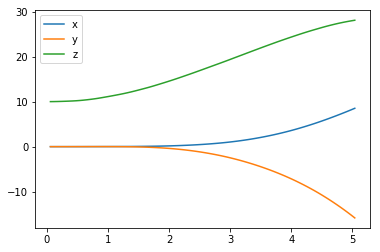

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

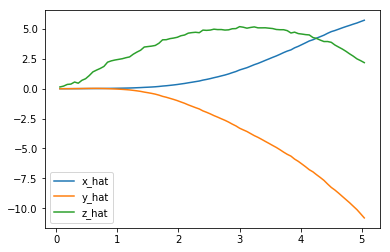

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

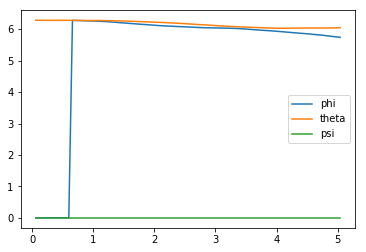

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

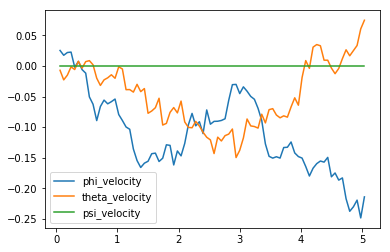

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

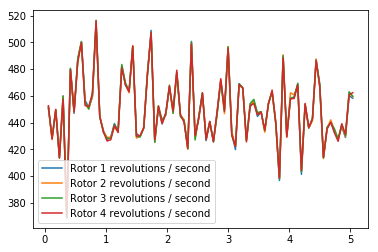

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  8.52123007 -15.84272689  28.09134616   5.73966775   6.04701909
   0.        ]
[  5.72752673 -10.80801713   2.18084611]
[-0.21412379  0.07492199  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action, state, w = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print(action)
            print(state.shape)
            print(w.shape)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

[ 110.7231093  -235.13886054  200.2736818  -240.34311735]
(18,)
(18, 4)
Episode =    1, score =  -1.690 (best =  -1.690), noise_scale = 0.05[ -60.33928498 -371.59420745   80.13765977 -283.56879089]
(18,)
(18, 4)
Episode =    2, score =  -3.397 (best =  -1.690), noise_scale = 0.1[  24.45560596 -359.83002793   91.64286859 -198.05422488]
(18,)
(18, 4)
Episode =    3, score =  -2.506 (best =  -1.690), noise_scale = 0.2[  49.25374996  478.07079608  270.02651197 -458.3118279 ]
(18,)
(18, 4)
Episode =    4, score =  -0.760 (best =  -0.760), noise_scale = 0.1[ 144.20196109 -712.84104354  348.09224492 -231.13221231]
(18,)
(18, 4)
Episode =    5, score =  -3.037 (best =  -0.760), noise_scale = 0.2[ -80.39185889  196.0363394   188.64450806 -404.55359953]
(18,)
(18, 4)
Episode =    6, score =  -1.897 (best =  -0.760), noise_scale = 0.4[  60.93852027 -241.84643482  152.14504129 -190.04630152]
(18,)
(18, 4)
Episode =    7, score =  -1.005 (best =  -0.760), noise_scale = 0.8[ -22.18172632  131.351536

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from landing import Landing

num_episodes = 1000
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
touching_surface = 5
threshold_velocity = 4
threshold_side_distance = 0.4

task = Landing(init_pose, init_velocities, init_angle_velocities, runtime, 
               touching_surface, threshold_velocity, threshold_side_distance)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 
          'rotor_speed4', 'x_accel', 'y_accel', 'z_accel', 'rewards']
results = {x : [] for x in labels}

episode_data = []
episode_results = []

# Run the simulation, and save the results.
data_file = open('data.txt', 'w')
results_file = open('results.txt', 'w')

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode_vars() # start a new episode
    rewards = 0
    results = {x : [] for x in labels}
    while True:        
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        
        print(f'{task.sim.pose[2]} / {task.distance} = {task.sim.pose[2]/task.distance} | ({reward})')
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds) + list(task.sim.linear_accel) + [reward]
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])

        agent.step(action, reward, next_state, done)
        state = next_state                 
        rewards+=reward
        if done:
            episode_data.append(results)
            episode_results.append(rewards)
            break
    sys.stdout.flush()

data_file.close()
results_file.close()

9.704548009555538 / 10.0 = 0.9704548009555538 | (0.031141239266731735)
9.546179655680701 / 10.0 = 0.9546179655680701 | (0.04760029980395952)
9.254490374861549 / 10.0 = 0.9254490374861548 | (0.07846219810646793)
8.956030355923325 / 10.0 = 0.8956030355923325 | (0.11744388730720245)
8.710146670907376 / 10.0 = 0.8710146670907376 | (0.1505384098839444)
8.373026785469252 / 10.0 = 0.8373026785469252 | (0.18930831365953005)
7.931967149000579 / 10.0 = 0.7931967149000579 | (0.24518074266210854)
7.534064710943268 / 10.0 = 0.7534064710943268 | (0.30332330560624887)
7.1435750702279845 / 10.0 = 0.7143575070227984 | (0.35786447430967505)
6.6274977463181255 / 10.0 = 0.6627497746318125 | (0.42762481343947445)
6.064886332608446 / 10.0 = 0.6064886332608446 | (0.5144656081976922)
5.559802706150887 / 10.0 = 0.5559802706150887 | (0.5999440215805576)
5.00132796595214 / 10.0 = 0.500132796595214 | (0.6912042893883781)
4.323450753401714 / 10.0 = 0.43234507534017136 | (46.54310568783685)
3.6580790969570063 / 10.

9.053529793560129 / 10.0 = 0.9053529793560129 | (0.10558893974818018)
8.818177532631124 / 10.0 = 0.8818177532631124 | (0.13699236691602013)
8.48832258571103 / 10.0 = 0.848832258571103 | (0.17442343404668614)
8.057070942549677 / 10.0 = 0.8057070942549677 | (0.2286831534489897)
7.671301423287932 / 10.0 = 0.7671301423287933 | (0.28465250930532493)
7.289623829544693 / 10.0 = 0.7289623829544694 | (0.33715594358054235)
6.780924061808208 / 10.0 = 0.6780924061808208 | (0.40497326939346623)
6.229366481702551 / 10.0 = 0.6229366481702552 | (0.48910222824768756)
5.735364201947878 / 10.0 = 0.5735364201947878 | (0.5713275722524997)
5.184192251007936 / 10.0 = 0.5184192251007935 | (0.6594169955199181)
4.514347478883257 / 10.0 = 0.4514347478883257 | (43.40124893383155)
3.8600102283144633 / 10.0 = 0.3860010228314463 | (58.44619025060872)
3.2358689883859286 / 10.0 = 0.3235868988385929 | (72.60340791071101)
2.506947821367957 / 10.0 = 0.2506947821367957 | (83.29859067287035)
1.7030354726514472 / 10.0 = 0.1

8.657896199512233 / 10.0 = 0.8657896199512234 | (0.15711344135953442)
8.317233184855244 / 10.0 = 0.8317233184855244 | (0.1965600654503986)
7.872026512924691 / 10.0 = 0.7872026512924691 | (0.25316478037281953)
7.468507384756112 / 10.0 = 0.7468507384756112 | (0.31231352575501137)
7.0736882173345705 / 10.0 = 0.707368821733457 | (0.3678585865590769)
6.555406797095438 / 10.0 = 0.6555406797095438 | (0.43845777932355223)
5.989437959873605 / 10.0 = 0.5989437959873605 | (0.5263095966421996)
5.480176037266561 / 10.0 = 0.5480176037266561 | (0.6131351345976818)
4.920337771215661 / 10.0 = 0.4920337771215661 | (14.689851413483256)
4.244657428161973 / 10.0 = 0.42446574281619726 | (48.196151410842276)
3.579549174309462 / 10.0 = 0.3579549174309462 | (63.71128836952283)
2.9476293058278316 / 10.0 = 0.29476293058278313 | (78.95995090641006)
2.220405311752562 / 10.0 = 0.22204053117525618 | (91.21177047460563)
1.4198072012889984 / 10.0 = 0.14198072012889984 | (113.05832112740154)
0.6634085878545747 / 10.0 =

7.5263119971665935 / 10.0 = 0.7526311997166594 | (0.30438927962159124)
7.135017733296034 / 10.0 = 0.7135017733296034 | (0.35906417097224663)
6.617864639784834 / 10.0 = 0.6617864639784834 | (0.4290275654794613)
6.054411600137266 / 10.0 = 0.6054411600137266 | (0.5160929787363199)
5.54845206768216 / 10.0 = 0.5548452067682159 | (0.6017972183923701)
4.988783149935825 / 10.0 = 0.49887831499358254 | (14.222102625976582)
4.309489148450308 / 10.0 = 0.43094891484503084 | (46.73269541543287)
3.6426461399730736 / 10.0 = 0.36426461399730736 | (62.2747732623548)
3.0078476216081667 / 10.0 = 0.3007847621608167 | (77.32800489581453)
2.2708941662902187 / 10.0 = 0.22708941662902188 | (89.14435406489788)
1.4564685272340696 / 10.0 = 0.14564685272340697 | (110.96437585346919)
0.6873775512520638 / 10.0 = 0.06873775512520638 | (146.1394698090973)
0.0 / 10.0 = 0.0 | (211.45390444940287)
10.041732593846515 / 10.0 = 1.0041732593846515 | (-0.002685927231900198)
10.135137644962358 / 10.0 = 1.0135137644962358 | (-0

4.832864232097058 / 10.0 = 0.4832864232097058 | (15.113062615937094)
4.147166698291048 / 10.0 = 0.41471666982910477 | (49.49954549479028)
3.470919094421052 / 10.0 = 0.3470919094421052 | (65.43583205675375)
2.8289677140158305 / 10.0 = 0.28289677140158304 | (81.27013490915235)
2.0875753536771398 / 10.0 = 0.20875753536771396 | (94.04001160312704)
1.2666032394887123 / 10.0 = 0.12666032394887122 | (117.34672164795204)
0.49024102811859227 / 10.0 = 0.049024102811859226 | (156.47980431577923)
0.0 / 10.0 = 0.0 | (237.2479439804307)
10.041879747518013 / 10.0 = 1.0041879747518014 | (-0.0026928998867183918)
10.135804183887517 / 10.0 = 1.0135804183887518 | (-0.012498334929554877)
10.215520757009273 / 10.0 = 1.0215520757009273 | (-0.02234070642149022)
10.230424942175276 / 10.0 = 1.0230424942175276 | (-0.027906762525915285)
10.16959082230106 / 10.0 = 1.016959082230106 | (-0.022772746429877033)
10.157768877068834 / 10.0 = 1.0157768877068833 | (-0.0185639183593862)
10.168176438060721 / 10.0 = 1.0168176

4.861933398290332 / 10.0 = 0.4861933398290332 | (14.937292419678297)
4.1765838852408175 / 10.0 = 0.41765838852408177 | (48.94110802987585)
3.5008520600978157 / 10.0 = 0.35008520600978155 | (64.81119816544654)
2.8590517859260656 / 10.0 = 0.28590517859260656 | (80.53980669399373)
2.1170072963326687 / 10.0 = 0.21170072963326686 | (93.14491256450884)
1.2946365473345336 / 10.0 = 0.12946365473345336 | (116.22210322725874)
0.5163259442241145 / 10.0 = 0.05163259442241145 | (154.8056828896364)
0.0 / 10.0 = 0.0 | (236.1789220218451)
10.041913791757713 / 10.0 = 1.0041913791757713 | (-0.002694240094677891)
10.136122895075019 / 10.0 = 1.013612289507502 | (-0.012523816035470148)
10.21601362635964 / 10.0 = 1.021601362635964 | (-0.022404428112724917)
10.228652848251905 / 10.0 = 1.0228652848251905 | (-0.027809508092581314)
10.162598117398971 / 10.0 = 1.016259811739897 | (-0.022177135229717537)
10.143866080497466 / 10.0 = 1.0143866080497466 | (-0.017180524742687275)
10.149443574954503 / 10.0 = 1.0149443

1.5608901082642723 / 10.0 = 0.15608901082642723 | (107.72483911486967)
0.7973602154676862 / 10.0 = 0.07973602154676862 | (141.10654794532118)
0.013965310826183516 / 10.0 = 0.0013965310826183515 | (197.35131253879447)
0.0 / 10.0 = 0.0 | (254.2496609573255)
10.042034665291563 / 10.0 = 1.0042034665291564 | (-0.0026995432713494694)
10.136646521960659 / 10.0 = 1.013664652196066 | (-0.012576704806393835)
10.216898758661525 / 10.0 = 1.0216898758661526 | (-0.022476555404518317)
10.233672365377975 / 10.0 = 1.0233672365377975 | (-0.028205574291512603)
10.176092455977269 / 10.0 = 1.0176092455977268 | (-0.023403657494906804)
10.168180777724334 / 10.0 = 1.0168180777724334 | (-0.01964829870732454)
10.181690381907401 / 10.0 = 1.0181690381907402 | (-0.02171632407198021)
10.070504633635455 / 10.0 = 1.0070504633635455 | (-0.014154350677490823)
9.893259970872565 / 10.0 = 0.9893259970872565 | (0.005985050376265844)
9.77906614181014 / 10.0 = 0.9779066141810141 | (0.022559720003270778)
9.62921769874385 / 10

2.463890846628416 / 10.0 = 0.2463890846628416 | (84.44660431096253)
1.6592392412335073 / 10.0 = 0.16592392412335072 | (104.77912489682504)
0.900898947220217 / 10.0 = 0.0900898947220217 | (136.68132748485323)
0.12218728833228557 / 10.0 = 0.012218728833228557 | (182.08171380972794)
0.0 / 10.0 = 0.0 | (254.44537354799064)
10.041748233889539 / 10.0 = 1.0041748233889538 | (-0.0026867168432931354)
10.135214049364889 / 10.0 = 1.013521404936489 | (-0.012440903474380205)
10.214587208823776 / 10.0 = 1.0214587208823775 | (-0.022257043483604688)
10.226533341324954 / 10.0 = 1.0226533341324955 | (-0.027585337017415945)
10.160014440141833 / 10.0 = 1.0160014440141834 | (-0.021886072509085475)
10.140961454189235 / 10.0 = 1.0140961454189235 | (-0.016848524473523252)
10.146014507327894 / 10.0 = 1.0146014507327894 | (-0.017778737784755805)
10.027892074847784 / 10.0 = 1.0027892074847784 | (-0.009358490741843584)
9.840648255421025 / 10.0 = 0.9840648255421025 | (0.011895880517315716)
9.715873950454199 / 10.0

0.0 / 10.0 = 0.0 | (219.75118033343813)
10.042185817567889 / 10.0 = 1.0042185817567888 | (-0.0027071806231122597)
10.137385751634486 / 10.0 = 1.0137385751634487 | (-0.012643720980141548)
10.218025326446654 / 10.0 = 1.0218025326446654 | (-0.022598185802044313)
10.23441977666154 / 10.0 = 1.0234419776661539 | (-0.028317367548053696)
10.175461779089716 / 10.0 = 1.0175461779089716 | (-0.02339150496689779)
10.165712545933241 / 10.0 = 1.016571254593324 | (-0.019426839023948927)
10.177859419453045 / 10.0 = 1.0177859419453044 | (-0.021309791424934277)
10.065569739506929 / 10.0 = 1.0065569739506928 | (-0.013612189621700299)
9.88666542392502 / 10.0 = 0.9886665423925021 | (0.0067068629331108465)
9.770668626972896 / 10.0 = 0.9770668626972896 | (0.023509826582918225)
9.619610652697675 / 10.0 = 0.9619610652697675 | (0.03886724544089026)
9.335693185839856 / 10.0 = 0.9335693185839856 | (0.0687012609214529)
9.04833869829792 / 10.0 = 0.904833869829792 | (0.10620036941876887)
8.812120622459732 / 10.0 = 0.

10.042095866929396 / 10.0 = 1.0042095866929395 | (-0.0027026616040195517)
10.136996828886986 / 10.0 = 1.0136996828886986 | (-0.01260680573639772)
10.217533486925076 / 10.0 = 1.0217533486925077 | (-0.022543846323276107)
10.233987877030222 / 10.0 = 1.0233987877030222 | (-0.028259457745245076)
10.175780948034967 / 10.0 = 1.0175780948034967 | (-0.023393453703139278)
10.167123908860502 / 10.0 = 1.0167123908860503 | (-0.019552082662124715)
10.180001218959942 / 10.0 = 1.0180001218959942 | (-0.021539367228285533)
10.068260853097394 / 10.0 = 1.0068260853097395 | (-0.013909535972056242)
9.890252410518475 / 10.0 = 0.9890252410518474 | (0.006314066332843149)
9.775246781537819 / 10.0 = 0.9775246781537819 | (0.02299253774190313)
9.624914221087993 / 10.0 = 0.9624914221087992 | (0.03824528578191566)
9.341650086619985 / 10.0 = 0.9341650086619986 | (0.06798973939318143)
9.055182904446983 / 10.0 = 0.9055182904446983 | (0.10537280894531176)
8.819817038154017 / 10.0 = 0.8819817038154018 | (0.13678341627758

10.154312009876083 / 10.0 = 1.0154312009876083 | (-0.021415475455031086)
10.129257621412833 / 10.0 = 1.0129257621412833 | (-0.01569089493647824)
10.129907459818911 / 10.0 = 1.0129907459818912 | (-0.016016600851776808)
10.008348398626012 / 10.0 = 1.0008348398626012 | (-0.007166383884183558)
9.815859723381545 / 10.0 = 0.9815859723381545 | (0.01466119418732692)
9.685403625550842 / 10.0 = 0.9685403625550842 | (0.033333049724590946)
9.524428999843312 / 10.0 = 0.9524428999843313 | (0.050177145134676526)
9.230065923151862 / 10.0 = 0.9230065923151862 | (0.08139453448537481)
8.927962776578488 / 10.0 = 0.8927962776578487 | (0.12086393314820354)
8.678791664504587 / 10.0 = 0.8678791664504587 | (0.15447634154656809)
8.339311306877176 / 10.0 = 0.8339311306877176 | (0.19367503791030594)
7.895357666192756 / 10.0 = 0.7895357666192756 | (0.2500369221044696)
7.493854725011615 / 10.0 = 0.7493854725011615 | (0.3088275889118285)
7.100671611251813 / 10.0 = 0.7100671611251813 | (0.3639897230467972)
6.58260533

10.149391580804034 / 10.0 = 1.0149391580804035 | (-0.01816081867756747)
10.031782480068635 / 10.0 = 1.0031782480068636 | (-0.009802296404580302)
9.845089149527567 / 10.0 = 0.9845089149527567 | (0.011382015074417384)
9.72085381957641 / 10.0 = 0.972085381957641 | (0.02925182464192333)
9.564270200474693 / 10.0 = 0.9564270200474694 | (0.04544544976989995)
9.274439306421575 / 10.0 = 0.9274439306421576 | (0.07605582849093606)
8.978461295625516 / 10.0 = 0.8978461295625516 | (0.11469575559472733)
8.734847641043974 / 10.0 = 0.8734847641043973 | (0.1474302368604964)
8.399600300101888 / 10.0 = 0.8399600300101888 | (0.18587795628258041)
7.960883864051166 / 10.0 = 0.7960883864051166 | (0.24135333876077603)
7.565581592556259 / 10.0 = 0.7565581592556259 | (0.29901039539308305)
7.177313895432215 / 10.0 = 0.7177313895432216 | (0.3530744480899881)
6.6635579362116415 / 10.0 = 0.6663557936211641 | (0.4223037761338466)
6.103696709699886 / 10.0 = 0.6103696709699886 | (0.5084463657111684)
5.601428382924566 /

9.825553273680688 / 10.0 = 0.9825553273680688 | (0.01358985526084211)
9.697634697164384 / 10.0 = 0.9697634697164383 | (0.031938686659411575)
9.538219850560273 / 10.0 = 0.9538219850560272 | (0.04853570142682284)
9.2454414453063 / 10.0 = 0.9245441445306299 | (0.07954795178215601)
8.94611306840392 / 10.0 = 0.8946113068403919 | (0.11867339968152368)
8.699292538520178 / 10.0 = 0.8699292538520178 | (0.15190197647692238)
8.36085598223465 / 10.0 = 0.836085598223465 | (0.19085985169182518)
7.918657548977742 / 10.0 = 0.7918657548977742 | (0.24695055097408136)
7.519913408596595 / 10.0 = 0.7519913408596595 | (0.3052770103618685)
7.1282261829436635 / 10.0 = 0.7128226182943663 | (0.36003124208702675)
6.610647751926336 / 10.0 = 0.6610647751926335 | (0.43009847447449545)
6.046734293294657 / 10.0 = 0.6046734293294657 | (0.5172917267663569)
5.540318949024281 / 10.0 = 0.5540318949024281 | (0.6031392976371027)
4.980267110448565 / 10.0 = 0.4980267110448565 | (14.267695954048792)
4.300446542563875 / 10.0 = 

9.443561180019785 / 10.0 = 0.9443561180019785 | (0.05983679303962197)
9.140482557471422 / 10.0 = 0.9140482557471422 | (0.09223470160097036)
8.826388676864426 / 10.0 = 0.8826388676864425 | (0.13334631322704227)
8.566518927549824 / 10.0 = 0.8566518927549824 | (0.16868816320976066)
8.218891093045457 / 10.0 = 0.8218891093045457 | (0.20935720786341006)
7.764643367719534 / 10.0 = 0.7764643367719535 | (0.26749205115297003)
7.351155010756402 / 10.0 = 0.7351155010756403 | (0.3285377184004322)
6.94832817757802 / 10.0 = 0.694832817757802 | (0.38589076006626133)
6.4211028764965725 / 10.0 = 0.6421102876496573 | (0.45852002535833314)
5.843651653973653 / 10.0 = 0.5843651653973654 | (0.5492241604022737)
5.323585356842771 / 10.0 = 0.532358535684277 | (0.6392541522290109)
4.7535076794583375 / 10.0 = 0.47535076794583375 | (29.914107500712866)
4.062767652049935 / 10.0 = 0.4062767652049935 | (50.886530847611596)
3.3815055722641265 / 10.0 = 0.33815055722641263 | (67.11381609668577)
2.734031483096101 / 10.0 

8.94666268433622 / 10.0 = 0.894666268433622 | (0.11858654733854401)
8.699680683403846 / 10.0 = 0.8699680683403846 | (0.1518521523202352)
8.36194707038738 / 10.0 = 0.836194707038738 | (0.19075187311663666)
7.920146216664124 / 10.0 = 0.7920146216664123 | (0.24675364742912542)
7.521015306885602 / 10.0 = 0.7521015306885601 | (0.305103927144577)
7.129764781148406 / 10.0 = 0.7129764781148407 | (0.3598441133272561)
6.613817468464312 / 10.0 = 0.6613817468464311 | (0.4297061343189187)
6.050901498163773 / 10.0 = 0.6050901498163773 | (0.5166647119564546)
5.545289074590412 / 10.0 = 0.5545289074590413 | (0.6023579912624591)
4.987463695128997 / 10.0 = 0.4987463695128997 | (14.278995782594523)
4.311384918399943 / 10.0 = 0.4311384918399943 | (46.87647561961691)
3.6471843006008386 / 10.0 = 0.36471843006008386 | (62.33110154871435)
3.0160030534642748 / 10.0 = 0.30160030534642746 | (77.35537811249975)
2.284806780380934 / 10.0 = 0.2284806780380934 | (89.13049298584218)
1.4774436358478336 / 10.0 = 0.147744

8.071957979069937 / 10.0 = 0.8071957979069937 | (0.2267621765126966)
7.68803893878003 / 10.0 = 0.7688038938780031 | (0.282401234075386)
7.307581494656271 / 10.0 = 0.7307581494656271 | (0.33463598247048143)
6.801190492075976 / 10.0 = 0.6801190492075976 | (0.40208710927501035)
6.252947881456522 / 10.0 = 0.6252947881456522 | (0.4855801069519038)
5.762190274326738 / 10.0 = 0.5762190274326737 | (0.5670861686121548)
5.214706756480598 / 10.0 = 0.5214706756480598 | (0.6543490178608562)
4.551030774112422 / 10.0 = 0.45510307741124223 | (30.09373553525039)
3.90345356052212 / 10.0 = 0.390345356052212 | (57.9487064722504)
3.287281803567822 / 10.0 = 0.3287281803567822 | (71.9028030708879)
2.5690369869798326 / 10.0 = 0.25690369869798324 | (82.3587234876521)
1.778111652460015 / 10.0 = 0.1778111652460015 | (101.83713325764697)
1.0362956127089606 / 10.0 = 0.10362956127089606 | (131.92633980107473)
0.2751767250175608 / 10.0 = 0.02751767250175608 | (169.9414876743586)
0.0 / 10.0 = 0.0 | (255.5720586655824

7.5265562472801975 / 10.0 = 0.7526556247280197 | (0.3043494506539519)
7.135436390630316 / 10.0 = 0.7135436390630316 | (0.3590157432960398)
6.618491359094395 / 10.0 = 0.6618491359094395 | (0.4289397169483571)
6.054879536873547 / 10.0 = 0.6054879536873548 | (0.5160070826392821)
5.548789947603287 / 10.0 = 0.5548789947603286 | (0.6017366901434272)
4.989255912427598 / 10.0 = 0.4989255912427598 | (14.220963874521212)
4.3098749147353885 / 10.0 = 0.4309874914735389 | (46.71632313400337)
3.642692987531753 / 10.0 = 0.3642692987531753 | (62.254251667855115)
3.0077160211071354 / 10.0 = 0.3007716021107135 | (77.32342843873138)
2.2704421202579024 / 10.0 = 0.22704421202579023 | (89.13253754417394)
1.4552987414868739 / 10.0 = 0.1455298741486874 | (110.96032782551184)
0.6853324832429957 / 10.0 = 0.06853324832429956 | (146.1826953209861)
0.0 / 10.0 = 0.0 | (211.5802144258662)
10.041607377872444 / 10.0 = 1.0041607377872444 | (-0.002680503449411953)
10.13454086755873 / 10.0 = 1.013454086755873 | (-0.01237

6.090850695039793 / 10.0 = 0.6090850695039793 | (0.5104210116925415)
5.587243443024235 / 10.0 = 0.5587243443024235 | (0.5954234863399468)
5.0295422960161025 / 10.0 = 0.5029542296016103 | (0.6862314673352159)
4.352202128825884 / 10.0 = 0.43522021288258844 | (46.025565139927)
3.6878212715235428 / 10.0 = 0.36878212715235426 | (61.460018752051255)
3.055160846639348 / 10.0 = 0.30551608466393476 | (76.3252164794801)
2.319513180439002 / 10.0 = 0.2319513180439002 | (87.88818387022525)
1.50692424883051 / 10.0 = 0.15069242488305098 | (109.35501776529156)
0.7400473820240635 / 10.0 = 0.07400473820240636 | (143.64520379210336)
0.0 / 10.0 = 0.0 | (207.8923774315997)
10.04161636350759 / 10.0 = 1.004161636350759 | (-0.002680690678818598)
10.13453244194454 / 10.0 = 1.013453244194454 | (-0.012377534371257992)
10.213631596343468 / 10.0 = 1.0213631596343469 | (-0.022155692995551313)
10.225021901013811 / 10.0 = 1.022502190101381 | (-0.027430710310676787)
10.157557075194644 / 10.0 = 1.0157557075194643 | (-0

3.645600360776634 / 10.0 = 0.3645600360776634 | (62.22687317793503)
3.0106614052687632 / 10.0 = 0.3010661405268763 | (77.24532866847466)
2.2729771284894262 / 10.0 = 0.22729771284894262 | (89.04213321975934)
1.4582960003393894 / 10.0 = 0.14582960003393894 | (110.89550840390311)
0.6890013792369347 / 10.0 = 0.06890013792369347 | (146.03401717337718)
0.0 / 10.0 = 0.0 | (211.30296313017317)
10.041735510324173 / 10.0 = 1.0041735510324172 | (-0.0026861590974955885)
10.135194932423712 / 10.0 = 1.0135194932423712 | (-0.01243748642365694)
10.214666404204095 / 10.0 = 1.0214666404204096 | (-0.02226400334675538)
10.226490599606503 / 10.0 = 1.0226490599606504 | (-0.027585730440209844)
10.159817178729265 / 10.0 = 1.0159817178729265 | (-0.021869549464421434)
10.14049893635316 / 10.0 = 1.014049893635316 | (-0.01680426572087068)
10.14542493436964 / 10.0 = 1.014542493436964 | (-0.017711304607602507)
10.027378434782095 / 10.0 = 1.0027378434782095 | (-0.009293481905962242)
9.840112963513292 / 10.0 = 0.9840

2.2869007314009298 / 10.0 = 0.228690073140093 | (88.73748734275249)
1.4729421462087708 / 10.0 = 0.14729421462087708 | (110.42526885014739)
0.7044043542235715 / 10.0 = 0.07044043542235714 | (145.31295947221545)
0.0 / 10.0 = 0.0 | (210.2492328622301)
10.041767684754689 / 10.0 = 1.0041767684754688 | (-0.0026876936222772763)
10.135345650986935 / 10.0 = 1.0135345650986936 | (-0.012451819923749552)
10.21490228030191 / 10.0 = 1.021490228030191 | (-0.0222868166425767)
10.226996559874676 / 10.0 = 1.0226996559874677 | (-0.027635488618127146)
10.160369230766888 / 10.0 = 1.0160369230766888 | (-0.021935032197802462)
10.141084164782415 / 10.0 = 1.0141084164782415 | (-0.016871748253042496)
10.146049288117428 / 10.0 = 1.014604928811743 | (-0.01778484887063425)
10.027912415811658 / 10.0 = 1.0027912415811657 | (-0.009361999564141188)
9.840495644684736 / 10.0 = 0.9840495644684737 | (0.011905409923848476)
9.715452590699497 / 10.0 = 0.9715452590699497 | (0.02987782026838748)
9.558313513363808 / 10.0 = 0.95

0.9277180782130883 / 10.0 = 0.09277180782130882 | (135.87268602034837)
0.15587344154197158 / 10.0 = 0.015587344154197158 | (179.24137140549433)
0.0 / 10.0 = 0.0 | (254.91318007527678)
10.041782812474752 / 10.0 = 1.004178281247475 | (-0.0026883895263778435)
10.13529935615468 / 10.0 = 1.0135299356154681 | (-0.012451844038873006)
10.214738302228568 / 10.0 = 1.0214738302228568 | (-0.022260533510252145)
10.229098717867068 / 10.0 = 1.0229098717867067 | (-0.027772121674668693)
10.16777065964273 / 10.0 = 1.016777065964273 | (-0.022574640363291154)
10.155584825606226 / 10.0 = 1.0155584825606225 | (-0.0183188913131771)
10.165500624698772 / 10.0 = 1.0165500624698773 | (-0.01992742197871822)
10.051051594956094 / 10.0 = 1.0051051594956095 | (-0.011968868969478352)
9.86960436131728 / 10.0 = 0.9869604361317281 | (0.008657070533859335)
9.7511130504234 / 10.0 = 0.9751113050423401 | (0.02578878337906909)
9.598050656087631 / 10.0 = 0.9598050656087631 | (0.041428145500006064)
9.311909975629007 / 10.0 = 0.

10.041559653948509 / 10.0 = 1.0041559653948509 | (-0.002678195142708395)
10.13433436969483 / 10.0 = 1.013433436969483 | (-0.012355436746038562)
10.21327326675144 / 10.0 = 1.021327326675144 | (-0.022134362606141655)
10.221675080298969 / 10.0 = 1.0221675080298969 | (-0.02717745963084317)
10.148149987458453 / 10.0 = 1.0148149987458452 | (-0.020785854205502607)
10.120209597718073 / 10.0 = 1.0120209597718073 | (-0.014727035743952177)
10.11859097094786 / 10.0 = 1.011859097094786 | (-0.014750985576635234)
9.995180172983885 / 10.0 = 0.9995180172983884 | (-0.005667110668344355)
9.800156494779083 / 10.0 = 0.9800156494779083 | (0.016451048497939325)
9.666991659759532 / 10.0 = 0.9666991659759532 | (0.03547592766108831)
9.504159570829577 / 10.0 = 0.9504159570829577 | (0.052604285487449776)
9.207847551070067 / 10.0 = 0.9207847551070067 | (0.08408556380866239)
8.902895226728958 / 10.0 = 0.8902895226728958 | (0.12394131402955666)
8.651276987172059 / 10.0 = 0.8651276987172059 | (0.15795892243647236)
8.

10.214225785470772 / 10.0 = 1.0214225785470772 | (-0.0222202580682469)
10.226378685816309 / 10.0 = 1.0226378685816309 | (-0.02755545675875304)
10.160513341752184 / 10.0 = 1.0160513341752184 | (-0.02191496167564666)
10.142399990823472 / 10.0 = 1.0142399990823472 | (-0.01698313103705429)
10.147999605285039 / 10.0 = 1.0147999605285039 | (-0.017997922902296182)
10.030233493946252 / 10.0 = 1.0030233493946252 | (-0.009621845718452038)
9.843751995635468 / 10.0 = 0.9843751995635468 | (0.011555180088894001)
9.719776003362538 / 10.0 = 0.9719776003362538 | (0.029391253090102043)
9.563172264949138 / 10.0 = 0.9563172264949138 | (0.04557785588228358)
9.273417011567197 / 10.0 = 0.9273417011567198 | (0.07618927113490392)
8.97771558965219 / 10.0 = 0.897771558965219 | (0.11480240775568251)
8.734224491944913 / 10.0 = 0.8734224491944913 | (0.14751387641530922)
8.39903271430858 / 10.0 = 0.8399032714308581 | (0.1859568938467353)
7.960566280631487 / 10.0 = 0.7960566280631487 | (0.241409205040512)
7.565554970

10.153188185858172 / 10.0 = 1.015318818585817 | (-0.021288593999277294)
10.127874587579052 / 10.0 = 1.0127874587579053 | (-0.015536057125620006)
10.128528897723735 / 10.0 = 1.0128528897723734 | (-0.01584924397044074)
10.007131775494242 / 10.0 = 1.0007131775494242 | (-0.007014861947371109)
9.814678829414785 / 10.0 = 0.9814678829414785 | (0.01480409726173515)
9.684215419136162 / 10.0 = 0.9684215419136162 | (0.03347823297756469)
9.52332718884518 / 10.0 = 0.952332718884518 | (0.05031710032396053)
9.229048592594927 / 10.0 = 0.9229048592594926 | (0.08152444726308139)
8.92697014604571 / 10.0 = 0.892697014604571 | (0.1209919707966951)
8.677929488352579 / 10.0 = 0.8677929488352578 | (0.15459539213770013)
8.338534177293763 / 10.0 = 0.8338534177293763 | (0.1937791431314423)
7.8944630614368805 / 10.0 = 0.789446306143688 | (0.25015387470842854)
7.492958713150343 / 10.0 = 0.7492958713150343 | (0.3089549659404811)
7.099696309758151 / 10.0 = 0.7099696309758151 | (0.36412471823920267)
6.581057667221362

9.885061000458128 / 10.0 = 0.9885061000458129 | (0.006931126148759459)
9.769820120282564 / 10.0 = 0.9769820120282564 | (0.02363954315097261)
9.618936180789593 / 10.0 = 0.9618936180789592 | (0.03895200830032286)
9.335210161280415 / 10.0 = 0.9335210161280415 | (0.06877449133393587)
9.048650866381976 / 10.0 = 0.9048650866381976 | (0.10619754436014517)
8.812954224354378 / 10.0 = 0.8812954224354378 | (0.13764782472833448)
8.482586113079707 / 10.0 = 0.8482586113079706 | (0.17515450046416725)
8.051065215770363 / 10.0 = 0.8051065215770363 | (0.22948686908919858)
7.665198508962525 / 10.0 = 0.7665198508962525 | (0.28549760870516017)
7.28310828302226 / 10.0 = 0.728310828302226 | (0.33806754249097304)
6.773972748585994 / 10.0 = 0.6773972748585994 | (0.4059927727086263)
6.222354216807252 / 10.0 = 0.6222354216807252 | (0.4902014508692988)
5.728270879459716 / 10.0 = 0.5728270879459716 | (0.5724891561438623)
5.1767909406844845 / 10.0 = 0.5176790940684485 | (0.6606892713549731)
4.506953272973126 / 10.0

9.047904251323885 / 10.0 = 0.9047904251323885 | (0.10628247991243278)
8.812103076187789 / 10.0 = 0.8812103076187789 | (0.13775537889590606)
8.481785364977174 / 10.0 = 0.8481785364977175 | (0.1752613380225735)
8.050032279562899 / 10.0 = 0.8050032279562899 | (0.22961186883669915)
7.663749409286689 / 10.0 = 0.7663749409286689 | (0.2856820624146008)
7.281681543041074 / 10.0 = 0.7281681543041074 | (0.338279227480915)
6.772583246702815 / 10.0 = 0.6772583246702815 | (0.4061961976218016)
6.220374067129103 / 10.0 = 0.6220374067129103 | (0.49047665584601075)
5.72578226449888 / 10.0 = 0.572578226449888 | (0.5728782557812633)
5.17422270219971 / 10.0 = 0.517422270219971 | (0.6611322624472942)
4.503856769293082 / 10.0 = 0.45038567692930825 | (43.56763102758938)
3.84897057163475 / 10.0 = 0.384897057163475 | (58.64304418614714)
3.2242538927740068 / 10.0 = 0.32242538927740066 | (72.83385378531078)
2.4946000925481875 / 10.0 = 0.24946000925481876 | (83.5766004009676)
1.690013059117981 / 10.0 = 0.16900130

8.438254089696418 / 10.0 = 0.8438254089696418 | (0.18086773844904125)
8.002781405419729 / 10.0 = 0.8002781405419729 | (0.2358275408799122)
7.611776081034769 / 10.0 = 0.7611776081034769 | (0.2927269295559083)
7.2262184228551725 / 10.0 = 0.7226218422855173 | (0.34611441187843284)
6.7144873846213695 / 10.0 = 0.6714487384621369 | (0.414756080711675)
6.158250171959553 / 10.0 = 0.6158250171959553 | (0.5000229454104029)
5.659538063583838 / 10.0 = 0.5659538063583838 | (0.5836325310960847)
5.105793133113509 / 10.0 = 0.5105793133113509 | (0.6730053615328806)
4.433252936245056 / 10.0 = 0.4433252936245056 | (44.761657043077804)
3.7744975354652657 / 10.0 = 0.37744975354652655 | (59.9648625729916)
3.1473983861999857 / 10.0 = 0.31473983861999855 | (74.4899125046275)
2.417459639038588 / 10.0 = 0.24174596390385877 | (85.5997616294278)
1.6112742027843998 / 10.0 = 0.16112742027844 | (106.250149591905)
0.8513634321141506 / 10.0 = 0.08513634321141506 | (138.82505632223092)
0.07143134957963683 / 10.0 = 0.00

7.153790199754358 / 10.0 = 0.7153790199754357 | (0.35640018907151017)
6.6378722783950055 / 10.0 = 0.6637872278395005 | (0.42606423951394434)
6.0756410473500715 / 10.0 = 0.6075641047350071 | (0.5127788470479874)
5.570950671448487 / 10.0 = 0.5570950671448487 | (0.5980937833613074)
5.0124389335067505 / 10.0 = 0.5012438933506751 | (0.6892203501972797)
4.334169114076811 / 10.0 = 0.4334169114076811 | (46.31560903506036)
3.66853454476496 / 10.0 = 0.366853454476496 | (61.796056422177685)
3.034930942324737 / 10.0 = 0.3034930942324737 | (76.75366950375508)
2.2987086303068587 / 10.0 = 0.22987086303068588 | (88.4199472843637)
1.4848916242203503 / 10.0 = 0.14848916242203503 | (110.02423231003587)
0.7165710960833775 / 10.0 = 0.07165710960833775 | (144.71877470328775)
0.0 / 10.0 = 0.0 | (209.42839907875452)
10.041888751957702 / 10.0 = 1.0041888751957702 | (-0.0026932355166437993)
10.135848052374 / 10.0 = 1.0135848052374 | (-0.012502696850928974)
10.21541382726102 / 10.0 = 1.021541382726102 | (-0.0223

4.378867089645762 / 10.0 = 0.43788670896457627 | (45.865677277942254)
3.721054616894261 / 10.0 = 0.3721054616894261 | (61.14272919138411)
3.0961031221239352 / 10.0 = 0.30961031221239355 | (75.81794479018892)
2.3717897815689724 / 10.0 = 0.23717897815689723 | (87.20398130585353)
1.5739824541489293 / 10.0 = 0.15739824541489295 | (107.98831815617113)
0.8247156716511115 / 10.0 = 0.08247156716511114 | (140.7975316217874)
0.059106622183114965 / 10.0 = 0.005910662218311496 | (190.65455533668288)
0.0 / 10.0 = 0.0 | (255.5374489410611)
10.04171038541163 / 10.0 = 1.004171038541163 | (-0.0026851784458421513)
10.135054613496289 / 10.0 = 1.0135054613496288 | (-0.012424208647453083)
10.214327546108699 / 10.0 = 1.02143275461087 | (-0.022237242452473938)
10.224702468771317 / 10.0 = 1.0224702468771318 | (-0.027444821154675836)
10.154756808947308 / 10.0 = 1.0154756808947307 | (-0.021414945520085382)
10.1312269758708 / 10.0 = 1.01312269758708 | (-0.015864788786944306)
10.13323367572738 / 10.0 = 1.01332336

3.3326535558059622 / 10.0 = 0.3332653555805962 | (70.69623957441391)
2.6084024185242494 / 10.0 = 0.26084024185242494 | (80.97498135557495)
1.8119876368085137 / 10.0 = 0.18119876368085136 | (100.48271326389948)
1.063582380861184 / 10.0 = 0.1063582380861184 | (130.3301397077321)
0.29120122783984304 / 10.0 = 0.029120122783984303 | (167.89955151846033)
0.0 / 10.0 = 0.0 | (249.53283927579184)
10.04161913662005 / 10.0 = 1.004161913662005 | (-0.0026803981079266403)
10.134719518842937 / 10.0 = 1.0134719518842936 | (-0.01239083385307782)
10.21380278972037 / 10.0 = 1.021380278972037 | (-0.022191304564874503)
10.222408483927396 / 10.0 = 1.0222408483927397 | (-0.027256428961823342)
10.149022823198598 / 10.0 = 1.0149022823198597 | (-0.020885139734293956)
10.121093677136313 / 10.0 = 1.0121093677136312 | (-0.014832335015921183)
10.119621111586339 / 10.0 = 1.0119621111586339 | (-0.014865683888698467)
9.996477717559497 / 10.0 = 0.9996477717559497 | (-0.00581199465674187)
9.801690687340672 / 10.0 = 0.98

0.9997194401430458 / 10.0 = 0.09997194401430458 | (132.55506880668574)
0.22168371119131572 / 10.0 = 0.022168371119131572 | (172.93244674540964)
0.0 / 10.0 = 0.0 | (254.43003391351203)
10.042057076098576 / 10.0 = 1.0042057076098576 | (-0.002700792665357943)
10.136649824294924 / 10.0 = 1.0136649824294923 | (-0.01257976212485068)
10.216800893511264 / 10.0 = 1.0216800893511264 | (-0.022464057272626903)
10.234552334333369 / 10.0 = 1.0234552334333369 | (-0.028260359390670287)
10.179457012003157 / 10.0 = 1.0179457012003157 | (-0.023689876580953673)
10.174898980686033 / 10.0 = 1.0174898980686033 | (-0.020316007753548693)
10.190631725297035 / 10.0 = 1.0190631725297035 | (-0.022702999235014065)
10.081138540741325 / 10.0 = 1.0081138540741326 | (-0.015347881690009224)
9.906786852931049 / 10.0 = 0.9906786852931049 | (0.004483882844869225)
9.795635961457737 / 10.0 = 0.9795635961457737 | (0.020664756145258867)
9.647795700283757 / 10.0 = 0.9647795700283757 | (0.03553992190734079)
9.367198420908679 / 1

0.0 / 10.0 = 0.0 | (254.88718822131494)
10.041987725109722 / 10.0 = 1.0041987725109722 | (-0.002697491836268995)
10.136528347141839 / 10.0 = 1.013652834714184 | (-0.012561145112034655)
10.216625133644765 / 10.0 = 1.0216625133644766 | (-0.022468527117410764)
10.229602241891035 / 10.0 = 1.0229602241891036 | (-0.027906584453096794)
10.164237276025968 / 10.0 = 1.016423727602597 | (-0.0223408686155544)
10.146376776107813 / 10.0 = 1.0146376776107813 | (-0.01744547935171381)
10.15258583023306 / 10.0 = 1.0152585830233058 | (-0.01851523243800668)
10.035582352793663 / 10.0 = 1.0035582352793662 | (-0.010231777616508397)
9.849625159800016 / 10.0 = 0.9849625159800016 | (0.010865844956942983)
9.726166770347348 / 10.0 = 0.9726166770347348 | (0.02863526953702289)
9.570124160916865 / 10.0 = 0.9570124160916865 | (0.044746603682005115)
9.28079658868989 / 10.0 = 0.928079658868989 | (0.07528616656996856)
8.985711301013902 / 10.0 = 0.8985711301013902 | (0.11381437317750365)
8.742901214877906 / 10.0 = 0.8742

10.214727228995551 / 10.0 = 1.021472722899555 | (-0.02227493212434939)
10.225843358756768 / 10.0 = 1.0225843358756768 | (-0.027543683145107245)
10.157730736854234 / 10.0 = 1.0157730736854234 | (-0.021684051653635183)
10.13670524137563 / 10.0 = 1.013670524137563 | (-0.01642006520612438)
10.140180783392358 / 10.0 = 1.0140180783392359 | (-0.017141707900747427)
10.020770375523153 / 10.0 = 1.0020770375523154 | (-0.008560629984822654)
9.83173576409902 / 10.0 = 0.9831735764099021 | (0.012894800037900889)
9.705002268784352 / 10.0 = 0.9705002268784352 | (0.03108462175466442)
9.546369054882463 / 10.0 = 0.9546369054882463 | (0.04756414680950338)
9.254521491508834 / 10.0 = 0.9254521491508834 | (0.07845547039409351)
8.956254334807808 / 10.0 = 0.8956254334807807 | (0.1174248115611346)
8.710377785870818 / 10.0 = 0.8710377785870819 | (0.15050454953490655)
8.37301713678554 / 10.0 = 0.837301713678554 | (0.18929983792303395)
7.93200927907097 / 10.0 = 0.793200927907097 | (0.24518094889716324)
7.5342168781

10.144535166174991 / 10.0 = 1.014453516617499 | (-0.017216672086029172)
10.150677241825381 / 10.0 = 1.015067724182538 | (-0.01829463522528929)
10.033475914374913 / 10.0 = 1.0033475914374912 | (-0.009986449707207745)
9.847569347273817 / 10.0 = 0.9847569347273817 | (0.011117650718802219)
9.724188170549787 / 10.0 = 0.9724188170549788 | (0.028878073973268248)
9.56807349774561 / 10.0 = 0.9568073497745611 | (0.044994448717824764)
9.27874308782832 / 10.0 = 0.927874308782832 | (0.07554388492497033)
8.983746512510029 / 10.0 = 0.8983746512510029 | (0.11406758921588356)
8.74092128420744 / 10.0 = 0.874092128420744 | (0.14667269056506582)
8.405944271763783 / 10.0 = 0.8405944271763783 | (0.18504904912009812)
7.967611518202688 / 10.0 = 0.7967611518202687 | (0.24046022274565815)
7.573040697525513 / 10.0 = 0.7573040697525513 | (0.2979968140697853)
7.185182059768967 / 10.0 = 0.7185182059768966 | (0.35194924948222206)
6.6713758575662 / 10.0 = 0.66713758575662 | (0.42112124482164304)
6.111656515876767 / 1

9.712776508767712 / 10.0 = 0.9712776508767712 | (0.030196579182301786)
9.55521522598915 / 10.0 = 0.955521522598915 | (0.04651774255755092)
9.264512806538239 / 10.0 = 0.9264512806538239 | (0.07725967633344799)
8.967723062529302 / 10.0 = 0.8967723062529303 | (0.1160271538330101)
8.723113857304819 / 10.0 = 0.8723113857304818 | (0.14890526831130158)
8.3869233389619 / 10.0 = 0.83869233389619 | (0.1875140493193762)
7.947360341806892 / 10.0 = 0.7947360341806892 | (0.24315521465022605)
7.550959996441357 / 10.0 = 0.7550959996441357 | (0.30101195487185795)
7.161670605532685 / 10.0 = 0.7161670605532685 | (0.35529685457906224)
6.647441384306931 / 10.0 = 0.6647441384306931 | (0.42471501246845655)
6.086856945496578 / 10.0 = 0.6086856945496578 | (0.5110724748970126)
5.583606434971187 / 10.0 = 0.5583606434971187 | (0.5960595808037584)
5.0277189485049405 / 10.0 = 0.502771894850494 | (0.686690359774679)
4.353753579649006 / 10.0 = 0.4353753579649006 | (46.18448202264422)
3.6919104646706757 / 10.0 = 0.369

9.560934236920493 / 10.0 = 0.9560934236920493 | (0.04583820545034145)
9.270815036792301 / 10.0 = 0.9270815036792301 | (0.07649983836608343)
8.975006002727403 / 10.0 = 0.8975006002727403 | (0.11514486019014358)
8.731313125541261 / 10.0 = 0.8731313125541261 | (0.14787819433931004)
8.39542983124569 / 10.0 = 0.8395429831245689 | (0.18639848646193902)
7.956312350696157 / 10.0 = 0.7956312350696157 | (0.24196445437132685)
7.561055229287193 / 10.0 = 0.7561055229287194 | (0.29964781805093477)
7.172308913304784 / 10.0 = 0.7172308913304783 | (0.35376725461115577)
6.657471744028762 / 10.0 = 0.6657471744028762 | (0.42316602088034583)
6.097022713479358 / 10.0 = 0.6097022713479359 | (0.5094827059015448)
5.59409054094854 / 10.0 = 0.559409054094854 | (0.5943114489204416)
5.036713352696985 / 10.0 = 0.5036713352696985 | (0.6849783939441206)
4.359854382943351 / 10.0 = 0.4359854382943351 | (45.90928131989804)
3.6961782391121702 / 10.0 = 0.369617823911217 | (61.324037952083465)
3.064151296963177 / 10.0 = 0.

7.944378635993109 / 10.0 = 0.7944378635993109 | (0.24352281007199017)
7.547450026145965 / 10.0 = 0.7547450026145965 | (0.30148566862966764)
7.157760854517049 / 10.0 = 0.7157760854517049 | (0.35584021273157973)
6.642115917257659 / 10.0 = 0.6642115917257658 | (0.4254351678031768)
6.079940266945955 / 10.0 = 0.6079940266945955 | (0.512096518807924)
5.575405757060739 / 10.0 = 0.557540575706074 | (0.597360420380644)
5.017423653299292 / 10.0 = 0.5017423653299292 | (0.6883690564158065)
4.339496729947255 / 10.0 = 0.43394967299472553 | (46.2273248101957)
3.6738129836442805 / 10.0 = 0.36738129836442807 | (61.6811002709163)
3.0405050464794177 / 10.0 = 0.30405050464794176 | (76.64556565294426)
2.3049012764885326 / 10.0 = 0.23049012764885327 | (88.2862749205915)
1.4913118449914433 / 10.0 = 0.14913118449914434 | (109.81221377164968)
0.7229624489885527 / 10.0 = 0.07229624489885526 | (144.39944425483185)
0.0 / 10.0 = 0.0 | (209.01186101094072)
10.0420000835841 / 10.0 = 1.00420000835841 | (-0.0026986454

7.1875034803064315 / 10.0 = 0.7187503480306432 | (0.3516068555795029)
6.673426778183645 / 10.0 = 0.6673426778183644 | (0.42080140695999435)
6.11403998402756 / 10.0 = 0.6114039984027559 | (0.5068438543280811)
5.612252143632313 / 10.0 = 0.5612252143632313 | (0.5913392294388568)
5.055737644852364 / 10.0 = 0.5055737644852364 | (0.6816622071110325)
4.379960799806581 / 10.0 = 0.43799607998065804 | (45.59008543843464)
3.7177848638504525 / 10.0 = 0.37177848638504524 | (60.95693024196444)
3.087146677046982 / 10.0 = 0.30871466770469824 | (75.68584278323706)
2.3533224715455803 / 10.0 = 0.23533224715455803 | (87.08362812489386)
1.5431041795009373 / 10.0 = 0.15431041795009373 | (108.2786466855936)
0.7789876853187758 / 10.0 = 0.07789876853187758 | (141.93960214401145)
0.0 / 10.0 = 0.0 | (205.57623160597313)
10.04203331496938 / 10.0 = 1.004203331496938 | (-0.0027000152286447143)
10.136543030350206 / 10.0 = 1.0136543030350205 | (-0.01256816378725012)
10.216665767013241 / 10.0 = 1.0216665767013242 | (-

5.994695604900729 / 10.0 = 0.5994695604900728 | (0.5254250461896153)
5.485126168431073 / 10.0 = 0.5485126168431073 | (0.6122819717630248)
4.923396773898022 / 10.0 = 0.4923396773898022 | (14.600643047785427)
4.241963782795214 / 10.0 = 0.4241963782795214 | (47.90715681064576)
3.5719551879234577 / 10.0 = 0.3571955187923458 | (63.60701136921381)
2.9350585968701965 / 10.0 = 0.29350585968701964 | (78.96081050686527)
2.1969096413703513 / 10.0 = 0.21969096413703512 | (91.12507256809184)
1.3803927810969034 / 10.0 = 0.13803927810969036 | (113.49931162995935)
0.6090652829233538 / 10.0 = 0.06090652829233538 | (150.09341019125483)
0.0 / 10.0 = 0.0 | (217.8496787187716)
10.041927465967467 / 10.0 = 1.0041927465967466 | (-0.0026947163557566878)
10.136233309259435 / 10.0 = 1.0136233309259435 | (-0.012533339649552167)
10.21625910299908 / 10.0 = 1.0216259102999081 | (-0.022427290437269987)
10.229312571541705 / 10.0 = 1.0229312571541704 | (-0.027867283114453745)
10.164269966167408 / 10.0 = 1.0164269966167

3.8502647716766236 / 10.0 = 0.38502647716766236 | (59.065290594280235)
3.2375181317509116 / 10.0 = 0.32375181317509116 | (73.27344158950157)
2.5282074883459216 / 10.0 = 0.25282074883459216 | (83.99064529479051)
1.7471588458036373 / 10.0 = 0.17471588458036375 | (103.36737806884844)
1.0162977966957292 / 10.0 = 0.10162977966957291 | (133.52039148837582)
0.27197240523803107 / 10.0 = 0.027197240523803106 | (171.45076577947648)
0.0 / 10.0 = 0.0 | (256.82326379687805)
10.041486276336554 / 10.0 = 1.0041486276336555 | (-0.0026745954493345714)
10.133822544861365 / 10.0 = 1.0133822544861366 | (-0.012313114380994694)
10.212262965755276 / 10.0 = 1.0212262965755277 | (-0.0220289696724989)
10.22121635295237 / 10.0 = 1.022121635295237 | (-0.027091799653321536)
10.149482574756655 / 10.0 = 1.0149482574756656 | (-0.020862377529706322)
10.123974921773977 / 10.0 = 1.0123974921773977 | (-0.015079864215557626)
10.1241271845911 / 10.0 = 1.0124127184591099 | (-0.01534859747582229)
10.00201072543679 / 10.0 = 1.

3.0022824141257574 / 10.0 = 0.30022824141257576 | (77.45131762808518)
2.2647754329759824 / 10.0 = 0.22647754329759823 | (89.28353004542473)
1.4508890607022409 / 10.0 = 0.1450889060702241 | (111.2067441554737)
0.6828714206983413 / 10.0 = 0.06828714206983413 | (146.4330865613005)
0.0 / 10.0 = 0.0 | (211.75522829223692)
10.04181937332013 / 10.0 = 1.004181937332013 | (-0.0026897387732807143)
10.135668868794294 / 10.0 = 1.0135668868794294 | (-0.012481253358695099)
10.215347728243156 / 10.0 = 1.0215347728243156 | (-0.022336280389104957)
10.227300997487308 / 10.0 = 1.0227300997487307 | (-0.0276800551766736)
10.160161742710569 / 10.0 = 1.016016174271057 | (-0.021933920407926744)
10.140123188466053 / 10.0 = 1.0140123188466053 | (-0.016787791269991192)
10.144490014231998 / 10.0 = 1.0144490014231997 | (-0.01762045475978624)
10.025944516622953 / 10.0 = 1.0025944516622953 | (-0.009143116840102161)
9.837955946495248 / 10.0 = 0.9837955946495247 | (0.012186857088194558)
9.71229932646358 / 10.0 = 0.971

0.0 / 10.0 = 0.0 | (211.67058531079405)
10.04174720790139 / 10.0 = 1.004174720790139 | (-0.0026866076645515324)
10.13537741065672 / 10.0 = 1.0135377410656718 | (-0.012450665165991914)
10.21498770630925 / 10.0 = 1.021498770630925 | (-0.02230618459938505)
10.224995777098615 / 10.0 = 1.0224995777098616 | (-0.0274997486410804)
10.153965015099903 / 10.0 = 1.0153965015099904 | (-0.021370191466257404)
10.128936109047835 / 10.0 = 1.0128936109047835 | (-0.01565168891829294)
10.129741593281148 / 10.0 = 1.0129741593281147 | (-0.015988919085803577)
10.008408507644086 / 10.0 = 1.0008408507644087 | (-0.0071651446544485076)
9.816084193131008 / 10.0 = 0.9816084193131008 | (0.01464048897910819)
9.68580984787057 / 10.0 = 0.9685809847870569 | (0.03329115496700574)
9.525063079188756 / 10.0 = 0.9525063079188756 | (0.05010871057548916)
9.230858640898012 / 10.0 = 0.9230858640898012 | (0.08130065343959814)
8.92886389770595 / 10.0 = 0.892886389770595 | (0.12075430265353271)
8.679899365626145 / 10.0 = 0.8679899

10.215586434553607 / 10.0 = 1.0215586434553607 | (-0.022359053506844084)
10.228549035503976 / 10.0 = 1.0228549035503975 | (-0.027779470480168156)
10.163422147202999 / 10.0 = 1.0163422147202998 | (-0.02223290896305552)
10.145904393525942 / 10.0 = 1.0145904393525942 | (-0.017376148123668944)
10.152298433480489 / 10.0 = 1.0152298433480489 | (-0.018475324359568335)
10.035371645704123 / 10.0 = 1.0035371645704123 | (-0.010203612391282535)
9.849637096840612 / 10.0 = 0.9849637096840611 | (0.010875543984415925)
9.72641704229885 / 10.0 = 0.972641704229885 | (0.028611623340473624)
9.570140668503454 / 10.0 = 0.9570140668503454 | (0.0447313415959778)
9.280816187960033 / 10.0 = 0.9280816187960033 | (0.0752916148068894)
8.98638660258181 / 10.0 = 0.898638660258181 | (0.11375717879190361)
8.743639616893292 / 10.0 = 0.8743639616893292 | (0.14631485397810928)
8.408297000571492 / 10.0 = 0.8408297000571492 | (0.18472726702187758)
7.970665630598748 / 10.0 = 0.7970665630598748 | (0.24008825072135764)
7.57699

10.178401358614552 / 10.0 = 1.0178401358614553 | (-0.02356915760287759)
10.173732416174081 / 10.0 = 1.0173732416174082 | (-0.020182404736148962)
10.189226563569605 / 10.0 = 1.0189226563569604 | (-0.022546987071116353)
10.079383861761192 / 10.0 = 1.0079383861761193 | (-0.015153275204496275)
9.904723713350222 / 10.0 = 0.9904723713350222 | (0.004720872460237668)
9.793353060942666 / 10.0 = 0.9793353060942666 | (0.02093255546448325)
9.64519001831077 / 10.0 = 0.964519001831077 | (0.0358440529137265)
9.364307361059266 / 10.0 = 0.9364307361059266 | (0.06528920399003602)
9.08154720819648 / 10.0 = 0.9081547208196479 | (0.10219829633184963)
8.849227112579953 / 10.0 = 0.8849227112579954 | (0.13311672529328478)
8.521514985128672 / 10.0 = 0.8521514985128672 | (0.17016349197674563)
8.093193352754243 / 10.0 = 0.8093193352754243 | (0.22395049620776586)
7.710903257207991 / 10.0 = 0.771090325720799 | (0.2792991387237854)
7.331924999708224 / 10.0 = 0.7331924999708224 | (0.33121383288254147)
6.825717793957

9.535045223938258 / 10.0 = 0.9535045223938259 | (0.04892075795604578)
9.24205284775877 / 10.0 = 0.9242052847758769 | (0.07995689524608307)
8.941727124602417 / 10.0 = 0.8941727124602418 | (0.11918511377891172)
8.694186165363693 / 10.0 = 0.8694186165363693 | (0.15254355517921203)
8.355977012724788 / 10.0 = 0.8355977012724788 | (0.19152030387107033)
7.91348441551811 / 10.0 = 0.791348441551811 | (0.24763019112720197)
7.513670790493252 / 10.0 = 0.7513670790493252 | (0.3061090365326381)
7.1218866719651475 / 10.0 = 0.7121886671965147 | (0.36096435092945733)
6.605068546134013 / 10.0 = 0.6605068546134013 | (0.430980908039291)
6.04102708052065 / 10.0 = 0.604102708052065 | (0.5181813965869907)
5.534516792172536 / 10.0 = 0.5534516792172536 | (0.6041223070991093)
4.975796873946149 / 10.0 = 0.4975796873946149 | (14.33117167317267)
4.298204117376548 / 10.0 = 0.4298204117376548 | (47.040757055192074)
3.632394028700011 / 10.0 = 0.3632394028700011 | (62.55628842619276)
2.9999137605619137 / 10.0 = 0.2999

9.347782820596315 / 10.0 = 0.9347782820596315 | (0.07019812926319147)
9.142727709844246 / 10.0 = 0.9142727709844246 | (0.09680987419549303)
8.83436609582407 / 10.0 = 0.883436609582407 | (0.1304406667773148)
8.433001890123732 / 10.0 = 0.8433001890123732 | (0.17998931481061575)
8.083008141935075 / 10.0 = 0.8083008141935075 | (0.2297271725216543)
7.726949218152087 / 10.0 = 0.7726949218152087 | (0.2765239563026608)
7.241237816036783 / 10.0 = 0.7241237816036783 | (0.33879026107082955)
6.723669710067948 / 10.0 = 0.6723669710067948 | (0.41512302091316655)
6.262787609913495 / 10.0 = 0.6262787609913495 | (0.48824984853167996)
5.734430320546471 / 10.0 = 0.5734430320546471 | (0.5675499267879712)
5.091711257680575 / 10.0 = 0.5091711257680575 | (0.6713701318634657)
4.473079713081162 / 10.0 = 0.4473079713081162 | (48.37273710087751)
3.878099994558452 / 10.0 = 0.38780999945584516 | (60.26257591234981)
3.172470083717207 / 10.0 = 0.3172470083717207 | (68.4474643276395)
2.400950836353902 / 10.0 = 0.2400

7.436154301750592 / 10.0 = 0.7436154301750592 | (0.31676262139637446)
7.038997557695259 / 10.0 = 0.7038997557695259 | (0.3728239354878624)
6.51773856154272 / 10.0 = 0.6517738561542721 | (0.44403032979772405)
5.947764845014081 / 10.0 = 0.5947764845014081 | (0.532789903234807)
5.434964193493572 / 10.0 = 0.5434964193493572 | (0.6206144900065733)
4.871778721955989 / 10.0 = 0.48717787219559894 | (14.916148921127808)
4.1898767963243335 / 10.0 = 0.41898767963243333 | (48.88984785903736)
3.5179742814865627 / 10.0 = 0.3517974281486563 | (64.65913440472158)
2.8801977486406214 / 10.0 = 0.28801977486406216 | (80.25825803417104)
2.1443132016369537 / 10.0 = 0.21443132016369537 | (92.77535177382768)
1.3308450952071231 / 10.0 = 0.13308450952071232 | (115.44765074300335)
0.5623497291772606 / 10.0 = 0.056234972917726056 | (152.8652686713629)
0.0 / 10.0 = 0.0 | (222.9319357018012)
10.041802238125769 / 10.0 = 1.0041802238125768 | (-0.002689042641030648)
10.135608390330257 / 10.0 = 1.0135608390330257 | (-0

7.139027030765084 / 10.0 = 0.7139027030765084 | (0.35851191482282563)
6.622463143630398 / 10.0 = 0.6622463143630398 | (0.4283568973072548)
6.059044985629893 / 10.0 = 0.6059044985629893 | (0.5153519114111226)
5.553207630025458 / 10.0 = 0.5553207630025458 | (0.6010118696979045)
4.994070340055859 / 10.0 = 0.4994070340055859 | (14.196891130146236)
4.314989190528293 / 10.0 = 0.43149891905282933 | (46.63414101746022)
3.6481666739685825 / 10.0 = 0.36481666739685825 | (62.15956147585796)
3.013540193387705 / 10.0 = 0.3013540193387705 | (77.20411206832453)
2.276482702508745 / 10.0 = 0.2276482702508745 | (88.97877806351535)
1.4616749896181838 / 10.0 = 0.14616749896181838 | (110.76269504699982)
0.6922400322135152 / 10.0 = 0.06922400322135151 | (145.8669397776523)
0.0 / 10.0 = 0.0 | (211.0815093992279)
10.04184525069977 / 10.0 = 1.004184525069977 | (-0.002691040036563841)
10.135700119007018 / 10.0 = 1.0135700119007018 | (-0.012487099854790351)
10.215351546047549 / 10.0 = 1.0215351546047549 | (-0.02

5.70982763395849 / 10.0 = 0.570982763395849 | (0.5754618136435842)
5.157656358882387 / 10.0 = 0.5157656358882388 | (0.6639921184942655)
4.486500220096162 / 10.0 = 0.44865002200961623 | (43.84330298705817)
3.8301763321928686 / 10.0 = 0.38301763321928683 | (58.94738056744122)
3.2045479060820394 / 10.0 = 0.3204547906082039 | (73.24374577024949)
2.4747474199856776 / 10.0 = 0.24747474199856775 | (84.08767190228502)
1.6691181544596654 / 10.0 = 0.16691181544596653 | (104.40912069515983)
0.9098214223652494 / 10.0 = 0.09098214223652494 | (136.2141903771725)
0.12911786607427359 / 10.0 = 0.012911786607427358 | (181.2036381081365)
0.0 / 10.0 = 0.0 | (254.30659317838433)
10.041890678447722 / 10.0 = 1.0041890678447722 | (-0.002692761625446183)
10.136058775291962 / 10.0 = 1.0136058775291963 | (-0.012517741809755512)
10.216010154229348 / 10.0 = 1.021601015422935 | (-0.022398955045002333)
10.229285041065513 / 10.0 = 1.0229285041065512 | (-0.027852754084951137)
10.164739802897465 / 10.0 = 1.016473980289

4.35118054326809 / 10.0 = 0.43511805432680906 | (46.17232081769707)
3.688016453706976 / 10.0 = 0.3688016453706976 | (61.52474098996317)
3.0580977933691322 / 10.0 = 0.3058097793369132 | (76.44055832519996)
2.328014691758095 / 10.0 = 0.2328014691758095 | (88.00744047682387)
1.5205773702350056 / 10.0 = 0.15205773702350056 | (109.17357737836339)
0.7588316664557168 / 10.0 = 0.07588316664557168 | (143.09559178696543)
0.0 / 10.0 = 0.0 | (206.9541991988915)
10.041735599454658 / 10.0 = 1.0041735599454658 | (-0.002686394156168115)
10.134977723384203 / 10.0 = 1.0134977723384204 | (-0.012423898806984912)
10.214062399356644 / 10.0 = 1.0214062399356645 | (-0.022196192060424558)
10.227508931253807 / 10.0 = 1.0227508931253806 | (-0.027628825760126485)
10.163740213050469 / 10.0 = 1.016374021305047 | (-0.022209570696377856)
10.148076870929726 / 10.0 = 1.0148076870929725 | (-0.017561214638893707)
10.155827157348096 / 10.0 = 1.0155827157348096 | (-0.018847897218229992)
10.03996049050416 / 10.0 = 1.0039960

4.406961118762694 / 10.0 = 0.4406961118762694 | (45.132560831572036)
3.746015054483133 / 10.0 = 0.3746015054483133 | (60.432347557220176)
3.116145205867494 / 10.0 = 0.31161452058674943 | (75.04895176612166)
2.3829057623443077 / 10.0 = 0.23829057623443078 | (86.32416106378649)
1.5734572484250764 / 10.0 = 0.15734572484250764 | (107.3093259302266)
0.8099165231777614 / 10.0 = 0.08099165231777614 | (140.5064493858662)
0.025697045891634244 / 10.0 = 0.0025697045891634246 | (194.6255587276973)
0.0 / 10.0 = 0.0 | (254.15756078556277)
10.041922944846101 / 10.0 = 1.0041922944846102 | (-0.0026946543194603656)
10.136013784696907 / 10.0 = 1.0136013784696907 | (-0.012519041447870194)
10.215911295862423 / 10.0 = 1.0215911295862423 | (-0.02237287763872642)
10.232508069695012 / 10.0 = 1.0232508069695012 | (-0.028071454552892172)
10.175331859644283 / 10.0 = 1.0175331859644283 | (-0.02329077272319524)
10.168210608129352 / 10.0 = 1.016821060812935 | (-0.019622620809774505)
10.181826829357135 / 10.0 = 1.018

2.2509790462958916 / 10.0 = 0.22509790462958917 | (89.66589820385772)
1.4359047917190286 / 10.0 = 0.14359047917190287 | (111.64087406309534)
0.6662117080580277 / 10.0 = 0.06662117080580277 | (147.1824754666264)
0.0 / 10.0 = 0.0 | (213.00015446319793)
10.042058478917085 / 10.0 = 1.0042058478917084 | (-0.002700884154565486)
10.136894579381435 / 10.0 = 1.0136894579381435 | (-0.012594640916610444)
10.217327791171313 / 10.0 = 1.0217327791171313 | (-0.02253372775466511)
10.23147409339242 / 10.0 = 1.0231474093392419 | (-0.02807541708247241)
10.168020398823925 / 10.0 = 1.0168020398823925 | (-0.022707281134122237)
10.152530223905478 / 10.0 = 1.0152530223905478 | (-0.018083974988340135)
10.160568518215356 / 10.0 = 1.0160568518215356 | (-0.019398722457285578)
10.045007854356754 / 10.0 = 1.0045007854356753 | (-0.011298023851520567)
9.861047334283366 / 10.0 = 0.9861047334283366 | (0.009574378074986623)
9.739698731570979 / 10.0 = 0.9739698731570978 | (0.027069074083107325)
9.584984946280882 / 10.0 =

0.0 / 10.0 = 0.0 | (217.77460564948143)
10.042019946700881 / 10.0 = 1.0042019946700882 | (-0.0026992082935939354)
10.136525578515938 / 10.0 = 1.0136525578515938 | (-0.012565611792703102)
10.216673439736413 / 10.0 = 1.0216673439736412 | (-0.0224553311350828)
10.233134932314144 / 10.0 = 1.0233134932314143 | (-0.02815539630728181)
10.175154789611438 / 10.0 = 1.0175154789611438 | (-0.02330924546773616)
10.166674901720889 / 10.0 = 1.016667490172089 | (-0.019493461514918486)
10.179524363606307 / 10.0 = 1.0179524363606307 | (-0.021485128915983642)
10.067749628375582 / 10.0 = 1.0067749628375582 | (-0.013848842120639304)
9.88985707570717 / 10.0 = 0.9889857075707169 | (0.006367311733364023)
9.774914656991585 / 10.0 = 0.9774914656991586 | (0.023033525828214274)
9.624492129311273 / 10.0 = 0.9624492129311273 | (0.03829318876248777)
9.341290871395211 / 10.0 = 0.9341290871395211 | (0.06803903392688337)
9.054962897516447 / 10.0 = 0.9054962897516446 | (0.10540557297838393)
8.819575015983954 / 10.0 = 0.

10.041545616119018 / 10.0 = 1.0041545616119019 | (-0.002677032841200244)
10.134411884394536 / 10.0 = 1.0134411884394536 | (-0.012359624799688662)
10.213358548526902 / 10.0 = 1.02133585485269 | (-0.022153618429758826)
10.21996471028957 / 10.0 = 1.021996471028957 | (-0.027063915276199335)
10.142004391750369 / 10.0 = 1.014200439175037 | (-0.020258286126621394)
10.107868364717701 / 10.0 = 1.01078683647177 | (-0.013500529376633263)
10.102015549026516 / 10.0 = 1.0102015549026517 | (-0.012918386039316054)
9.97557688027911 / 10.0 = 0.997557688027911 | (-0.003448908057163247)
9.775509094141844 / 10.0 = 0.9775509094141844 | (0.019212665850018018)
9.636855463856255 / 10.0 = 0.9636855463856255 | (0.038949483569694965)
9.470344240465757 / 10.0 = 0.9470344240465757 | (0.05663825104286413)
9.170182709861827 / 10.0 = 0.9170182709861827 | (0.08863191592758735)
8.859771371702417 / 10.0 = 0.8859771371702416 | (0.12922317026138896)
8.60343776085314 / 10.0 = 0.860343776085314 | (0.16400947326309667)
8.2589

10.23056620361425 / 10.0 = 1.023056620361425 | (-0.027959742086661965)
10.168517016808677 / 10.0 = 1.0168517016808676 | (-0.022695493684120382)
10.155291586824339 / 10.0 = 1.0155291586824338 | (-0.01832639719580942)
10.164252481486836 / 10.0 = 1.0164252481486835 | (-0.019814656800771324)
10.049042304029033 / 10.0 = 1.0049042304029032 | (-0.011759357653056357)
9.86657061541431 / 10.0 = 0.986657061541431 | (0.008977792217271685)
9.746863486586514 / 10.0 = 0.9746863486586514 | (0.0262576680626877)
9.592936121959491 / 10.0 = 0.9592936121959491 | (0.042023124596081596)
9.30595366353048 / 10.0 = 0.930595366353048 | (0.07226432586518072)
9.014706238247257 / 10.0 = 0.9014706238247256 | (0.11029832643530424)
8.775001275472468 / 10.0 = 0.8775001275472467 | (0.14238576142356818)
8.441821053498487 / 10.0 = 0.8441821053498486 | (0.18039410323486238)
8.006359186537338 / 10.0 = 0.8006359186537338 | (0.23534631866073163)
7.615690614588134 / 10.0 = 0.7615690614588134 | (0.29219580383011845)
7.230248180

10.147225379211763 / 10.0 = 1.0147225379211764 | (-0.02072981083132719)
10.11758321370256 / 10.0 = 1.011758321370256 | (-0.01448195208621228)
10.114709990477092 / 10.0 = 1.011470999047709 | (-0.014332086346862782)
9.990392715354094 / 10.0 = 0.9990392715354094 | (-0.005131766526525694)
9.793959853200596 / 10.0 = 0.9793959853200596 | (0.01713884060820281)
9.659235192684399 / 10.0 = 0.9659235192684399 | (0.03636328752856355)
9.495291251042818 / 10.0 = 0.9495291251042819 | (0.05365516841483986)
9.197858301092941 / 10.0 = 0.919785830109294 | (0.08528723259232962)
8.891505327500434 / 10.0 = 0.8891505327500434 | (0.12533748148513557)
8.638569347933641 / 10.0 = 0.8638569347933641 | (0.15955859558017127)
8.296249385295658 / 10.0 = 0.8296249385295658 | (0.1992708136783723)
7.848596040216795 / 10.0 = 0.7848596040216795 | (0.25625984418280734)
7.442700318071784 / 10.0 = 0.7442700318071784 | (0.31586376415438433)
7.046107750803698 / 10.0 = 0.7046107750803698 | (0.3718067507981262)
6.524777250672632

10.041793310653851 / 10.0 = 1.004179331065385 | (-0.010928081753219576)
9.857411725534687 / 10.0 = 0.9857411725534687 | (0.009994510727233008)
9.735612736782366 / 10.0 = 0.9735612736782366 | (0.027549178257403995)
9.580679464703037 / 10.0 = 0.9580679464703037 | (0.043492817068954914)
9.292621842952892 / 10.0 = 0.9292621842952892 | (0.07387130034584333)
8.999313975561185 / 10.0 = 0.8999313975561185 | (0.11216106560478312)
8.757923237376806 / 10.0 = 0.8757923237376806 | (0.1445305700349172)
8.4240468338726 / 10.0 = 0.84240468338726 | (0.18270918661005686)
7.987218890465476 / 10.0 = 0.7987218890465476 | (0.2378685937449494)
7.594370360838668 / 10.0 = 0.7594370360838668 | (0.29508256723126747)
7.207748470454848 / 10.0 = 0.7207748470454848 | (0.3487395852673708)
6.695156426535599 / 10.0 = 0.6695156426535599 | (0.4176098464282402)
6.137261080144765 / 10.0 = 0.6137261080144765 | (0.5032439392170093)
5.636920434105168 / 10.0 = 0.5636920434105168 | (0.5873107722903148)
5.082218108373921 / 10.0 

10.031579786789763 / 10.0 = 1.0031579786789764 | (-0.00977132719094942)
9.845026412739792 / 10.0 = 0.9845026412739791 | (0.011394606592575185)
9.720890633959709 / 10.0 = 0.9720890633959709 | (0.02925143076370129)
9.564459776174926 / 10.0 = 0.9564459776174926 | (0.045428914914705576)
9.27474032074033 / 10.0 = 0.927474032074033 | (0.07602180626664834)
8.978781423747117 / 10.0 = 0.8978781423747118 | (0.11465543831136826)
8.735222197250804 / 10.0 = 0.8735222197250805 | (0.14738545162434535)
8.400070561740169 / 10.0 = 0.8400070561740168 | (0.18581837756838426)
7.961165925871456 / 10.0 = 0.7961165925871456 | (0.2413034704453625)
7.565564474824373 / 10.0 = 0.7565564474824373 | (0.29899953356888964)
7.177244296301171 / 10.0 = 0.7177244296301171 | (0.35308537656331596)
6.663283916675961 / 10.0 = 0.666328391667596 | (0.42232860105973735)
6.102641583901223 / 10.0 = 0.6102641583901223 | (0.5085681737762748)
5.599570848283228 / 10.0 = 0.5599570848283227 | (0.5934024717622916)
5.043508590685364 / 10

9.253922981750986 / 10.0 = 0.9253922981750986 | (0.07852844763105027)
8.955301054447798 / 10.0 = 0.8955301054447797 | (0.11752949605219076)
8.70927750287058 / 10.0 = 0.8709277502870579 | (0.15064602301011598)
8.372217115997087 / 10.0 = 0.8372217115997087 | (0.18942048471477202)
7.931282027600408 / 10.0 = 0.7931282027600408 | (0.24527826484532778)
7.533339878444146 / 10.0 = 0.7533339878444145 | (0.30342304535692655)
7.1429813321986595 / 10.0 = 0.7142981332198659 | (0.35796071495883586)
6.627274823866431 / 10.0 = 0.6627274823866431 | (0.42767692718319195)
6.064683757728621 / 10.0 = 0.6064683757728621 | (0.5144934340096846)
5.559674741094997 / 10.0 = 0.5559674741094998 | (0.5999765631239715)
5.001988369115762 / 10.0 = 0.5001988369115762 | (0.6911403815278228)
4.324830211831017 / 10.0 = 0.4324830211831017 | (46.549485248578605)
3.659502841724015 / 10.0 = 0.3659502841724015 | (62.00635127191107)
3.027279234290636 / 10.0 = 0.3027279234290636 | (77.03019305643954)
2.2938232577811557 / 10.0 = 

8.012933554158453 / 10.0 = 0.8012933554158452 | (0.2344817940342192)
7.622521173975982 / 10.0 = 0.7622521173975982 | (0.2912515440812973)
7.237835375339023 / 10.0 = 0.7237835375339023 | (0.3444854884541956)
6.727111867556409 / 10.0 = 0.6727111867556409 | (0.41291095277305967)
6.171544467777564 / 10.0 = 0.6171544467777564 | (0.49795746788539275)
5.673474978044089 / 10.0 = 0.5673474978044089 | (0.5813583157379754)
5.120729294812837 / 10.0 = 0.5120729294812837 | (0.6704463740032384)
4.449455521736357 / 10.0 = 0.4449455521736357 | (44.52552831034369)
3.7918122801973846 / 10.0 = 0.37918122801973847 | (59.66714746525214)
3.1659442844561214 / 10.0 = 0.31659442844561214 | (74.13476130519744)
2.4379316471423733 / 10.0 = 0.24379316471423734 | (85.18056466365692)
1.634172979143731 / 10.0 = 0.1634172979143731 | (105.64228745199406)
0.8768171942562297 / 10.0 = 0.08768171942562297 | (137.83693769132788)
0.10025208673870986 / 10.0 = 0.010025208673870986 | (184.64732138997073)
0.0 / 10.0 = 0.0 | (254.

7.4593195605628875 / 10.0 = 0.7459319560562887 | (0.3135804304333991)
7.063621744109013 / 10.0 = 0.7063621744109013 | (0.3692771427296242)
6.542708000361812 / 10.0 = 0.6542708000361812 | (0.440236616353067)
5.9738683725002755 / 10.0 = 0.5973868372500275 | (0.5286714189571222)
5.462448812965303 / 10.0 = 0.5462448812965304 | (0.6160168466198537)
4.898958059687576 / 10.0 = 0.4898958059687576 | (14.722213309021395)
4.2154873515586075 / 10.0 = 0.4215487351558608 | (48.30532034995204)
3.5431877362507342 / 10.0 = 0.3543187736250734 | (64.0933481691022)
2.9038029487985644 / 10.0 = 0.29038029487985645 | (79.57045236222116)
2.163129078599824 / 10.0 = 0.21631290785998242 | (91.92419886657824)
1.3440495805595156 / 10.0 = 0.13440495805595157 | (114.64750494173548)
0.5699767188065542 / 10.0 = 0.05699767188065542 | (152.04143551039886)
0.0 / 10.0 = 0.0 | (222.07417800776693)
10.042015794358141 / 10.0 = 1.0042015794358141 | (-0.0026984557657052655)
10.136584052598772 / 10.0 = 1.0136584052598772 | (-0.

6.1468218990662 / 10.0 = 0.61468218990662 | (0.5017611016927805)
5.646903281983276 / 10.0 = 0.5646903281983275 | (0.5856668955178623)
5.091813878425382 / 10.0 = 0.5091813878425382 | (0.6753781439926263)
4.417353944772388 / 10.0 = 0.44173539447723875 | (44.95386220321427)
3.756713660173154 / 10.0 = 0.3756713660173154 | (60.22716406865858)
3.1272821080646773 / 10.0 = 0.31272821080646773 | (74.81633249586855)
2.3942597921078876 / 10.0 = 0.23942597921078876 | (86.0287514465503)
1.5848093521644333 / 10.0 = 0.15848093521644332 | (106.93255090399333)
0.8213235943805286 / 10.0 = 0.08213235943805286 | (139.97439238015193)
0.036879335839490844 / 10.0 = 0.0036879335839490844 | (192.55525463729902)
0.0 / 10.0 = 0.0 | (254.10895256980172)
10.04158519263103 / 10.0 = 1.004158519263103 | (-0.002679314185036308)
10.134389648708888 / 10.0 = 1.0134389648708888 | (-0.012363361763743086)
10.21319691208476 / 10.0 = 1.0213196912084759 | (-0.022126660912016094)
10.2221946896304 / 10.0 = 1.0222194689630402 | (

6.378264733484665 / 10.0 = 0.6378264733484664 | (0.4664582607930787)
5.894167397259547 / 10.0 = 0.5894167397259548 | (0.5458718166100335)
5.350270292649478 / 10.0 = 0.5350270292649478 | (0.6311449077405253)
4.688462684938574 / 10.0 = 0.46884626849385735 | (28.45035193299801)
4.044294534236576 / 10.0 = 0.40442945342365755 | (55.28179591772364)
3.428831423268297 / 10.0 = 0.3428831423268297 | (68.74909128759516)
2.7068839999174767 / 10.0 = 0.27068839999174765 | (78.6065897588343)
1.9118401819836706 / 10.0 = 0.19118401819836706 | (97.51498152899757)
1.1643499824311272 / 10.0 = 0.11643499824311272 | (126.32988089029597)
0.3923010462584479 / 10.0 = 0.039230104625844794 | (160.91275203042596)
0.0 / 10.0 = 0.0 | (238.4302746088115)
10.041908221964464 / 10.0 = 1.0041908221964464 | (-0.0026939374072880717)
10.136124891097642 / 10.0 = 1.0136124891097642 | (-0.012523055365804225)
10.215968726374541 / 10.0 = 1.021596872637454 | (-0.022406228591536514)
10.227457712390363 / 10.0 = 1.0227457712390362 

5.5670332737421155 / 10.0 = 0.5567033273742116 | (0.5987654571205989)
5.009359631098126 / 10.0 = 0.5009359631098126 | (0.6898305977881865)
4.332723770520947 / 10.0 = 0.4332723770520947 | (46.435348721138794)
3.6684113390847846 / 10.0 = 0.36684113390847845 | (61.87502546031208)
3.0367562619428687 / 10.0 = 0.3036756261942869 | (76.8319145908907)
2.3037719835412607 / 10.0 = 0.23037719835412607 | (88.4872943991245)
1.4936534038038616 / 10.0 = 0.14936534038038615 | (109.94192741514959)
0.7293261037960901 / 10.0 = 0.072932610379609 | (144.35946351121788)
0.0 / 10.0 = 0.0 | (208.68987172127984)
10.041642597475223 / 10.0 = 1.0041642597475222 | (-0.0026816907115279065)
10.134831134563392 / 10.0 = 1.0134831134563391 | (-0.012400566053081041)
10.21408126987599 / 10.0 = 1.021408126987599 | (-0.022216179729204644)
10.223173910696115 / 10.0 = 1.0223173910696115 | (-0.02732410048542455)
10.15078749782981 / 10.0 = 1.015078749782981 | (-0.02105023564104691)
10.124192505295182 / 10.0 = 1.012419250529518

2.1645946210087823 / 10.0 = 0.21645946210087824 | (91.88224241495777)
1.3446929639364544 / 10.0 = 0.13446929639364544 | (114.56385563604606)
0.5693572294201721 / 10.0 = 0.05693572294201721 | (151.99211556673882)
0.0 / 10.0 = 0.0 | (222.17709291403844)
10.041544453204406 / 10.0 = 1.0041544453204405 | (-0.002676882434483163)
10.134304807357323 / 10.0 = 1.0134304807357322 | (-0.012353399599916326)
10.213058580136744 / 10.0 = 1.0213058580136745 | (-0.022119610597616024)
10.220653677550672 / 10.0 = 1.0220653677550673 | (-0.027095193712501242)
10.145316643677523 / 10.0 = 1.0145316643677522 | (-0.020531458181466178)
10.1148826525462 / 10.0 = 1.01148826525462 | (-0.014190550008114533)
10.111517364912457 / 10.0 = 1.0111517364912457 | (-0.01396810013240235)
9.98679623799719 / 10.0 = 0.998679623799719 | (-0.004719033312505783)
9.789712680741479 / 10.0 = 0.9789712680741479 | (0.017625134810520415)
9.654392662375846 / 10.0 = 0.9654392662375846 | (0.03693331090481)
9.490086663859579 / 10.0 = 0.94900

0.0 / 10.0 = 0.0 | (254.13392209324175)
10.042054442827938 / 10.0 = 1.004205444282794 | (-0.0027009917714140297)
10.13675130796097 / 10.0 = 1.0136751307960972 | (-0.01258396600348588)
10.217074602800633 / 10.0 = 1.0217074602800633 | (-0.02250286308467686)
10.232274081886187 / 10.0 = 1.0232274081886188 | (-0.02811590915909923)
10.171677068866039 / 10.0 = 1.0171677068866039 | (-0.0230109222181627)
10.160075863771885 / 10.0 = 1.0160075863771885 | (-0.01882922972799239)
10.170770033625411 / 10.0 = 1.0170770033625411 | (-0.020520614274975868)
10.057249900152199 / 10.0 = 1.0057249900152199 | (-0.012670810686870482)
9.876672279237626 / 10.0 = 0.9876672279237626 | (0.00783906887403063)
9.758931013048162 / 10.0 = 0.9758931013048162 | (0.024868308758167146)
9.606617074971927 / 10.0 = 0.9606617074971927 | (0.04041001489848295)
9.321329161718397 / 10.0 = 0.9321329161718397 | (0.07042540065033998)
9.032152241591433 / 10.0 = 0.9032152241591433 | (0.10817336477900086)
8.794276295736768 / 10.0 = 0.879

10.14341418680452 / 10.0 = 1.014341418680452 | (-0.017118258061395997)
10.148949645002464 / 10.0 = 1.0148949645002463 | (-0.01810980365554049)
10.031255632424704 / 10.0 = 1.0031255632424705 | (-0.009742915406556474)
9.844531325643707 / 10.0 = 0.9844531325643707 | (0.01144911750804789)
9.720352344180464 / 10.0 = 0.9720352344180464 | (0.029315123217386163)
9.563626788117476 / 10.0 = 0.9563626788117476 | (0.04551564277113607)
9.273567982337612 / 10.0 = 0.9273567982337612 | (0.07615769142128881)
8.977899513134991 / 10.0 = 0.8977899513134991 | (0.11478515869929984)
8.734461824166122 / 10.0 = 0.8734461824166122 | (0.14748024895247525)
8.39859391356495 / 10.0 = 0.839859391356495 | (0.18597929807896407)
7.959646801610134 / 10.0 = 0.7959646801610134 | (0.24152327110868177)
7.564871230519783 / 10.0 = 0.7564871230519783 | (0.29913337617034763)
7.176108959189833 / 10.0 = 0.7176108959189833 | (0.3532078006915099)
6.660977896368106 / 10.0 = 0.6660977896368105 | (0.42262675827557206)
6.10097788674155

9.629437256478068 / 10.0 = 0.9629437256478068 | (0.03980730228892959)
9.46189976068308 / 10.0 = 0.946189976068308 | (0.05764148914942768)
9.160820405583694 / 10.0 = 0.9160820405583694 | (0.08976858275199506)
8.849303574907857 / 10.0 = 0.8849303574907857 | (0.13051611342707092)
8.591722225482261 / 10.0 = 0.8591722225482261 | (0.16548537336542224)
8.246068508060043 / 10.0 = 0.8246068508060043 | (0.20581487656039343)
7.794342062370473 / 10.0 = 0.7794342062370473 | (0.26351790236770667)
7.3834966977525465 / 10.0 = 0.7383496697752546 | (0.32404592112971997)
6.982759124020664 / 10.0 = 0.6982759124020663 | (0.38091468229767644)
6.458050877443641 / 10.0 = 0.6458050877443642 | (0.452982655356024)
5.883949456945901 / 10.0 = 0.58839494569459 | (0.5428674881433808)
5.3670216604582945 / 10.0 = 0.5367021660458294 | (0.6319729183929472)
4.799834628067578 / 10.0 = 0.4799834628067578 | (15.298263100391656)
4.1133610756230965 / 10.0 = 0.41133610756230965 | (50.13501476848759)
3.4369044800020023 / 10.0 =

9.553697592684447 / 10.0 = 0.9553697592684447 | (0.046700442050342295)
9.262623128894496 / 10.0 = 0.9262623128894496 | (0.07747453241548619)
8.965091318287277 / 10.0 = 0.8965091318287277 | (0.11633120480818315)
8.720078412886739 / 10.0 = 0.8720078412886739 | (0.1492857157372659)
8.383548100964195 / 10.0 = 0.8383548100964194 | (0.1879408992683006)
7.9431019429343905 / 10.0 = 0.7943101942934391 | (0.2436922746339143)
7.545951783011972 / 10.0 = 0.7545951783011973 | (0.3016860400630881)
7.156269336611917 / 10.0 = 0.7156269336611917 | (0.356061205159805)
6.640798826095706 / 10.0 = 0.6640798826095706 | (0.42564114095371175)
6.078463685027246 / 10.0 = 0.6078463685027246 | (0.5123188552274326)
5.5737681743346394 / 10.0 = 0.5573768174334639 | (0.5976296832021109)
5.0159892537385025 / 10.0 = 0.5015989253738502 | (0.6886382514331326)
4.338175641857471 / 10.0 = 0.4338175641857471 | (46.25555578572086)
3.6723204261964817 / 10.0 = 0.36723204261964815 | (61.70232953405224)
3.0390208086813466 / 10.0 =

7.5930685282341095 / 10.0 = 0.7593068528234109 | (0.29527024095413246)
7.206250986100683 / 10.0 = 0.7206250986100683 | (0.34894261066464094)
6.693458150315543 / 10.0 = 0.6693458150315543 | (0.4178589725986238)
6.1358126181341905 / 10.0 = 0.6135812618134191 | (0.5034900180979519)
5.635726811694667 / 10.0 = 0.5635726811694667 | (0.587518589037917)
5.080865505796123 / 10.0 = 0.5080865505796124 | (0.6773310940365774)
4.407558760475636 / 10.0 = 0.4407558760475636 | (45.209544273452856)
3.7481423892585153 / 10.0 = 0.37481423892585153 | (60.479253250984414)
3.120444361613727 / 10.0 = 0.3120444361613727 | (75.07915403945708)
2.390516481434665 / 10.0 = 0.2390516481434665 | (86.33226319505918)
1.5853355047413717 / 10.0 = 0.15853355047413717 | (107.17238150389254)
0.8271420651491105 / 10.0 = 0.08271420651491104 | (140.0673806509408)
0.04956104636682081 / 10.0 = 0.0049561046366820806 | (191.08267175349636)
0.0 / 10.0 = 0.0 | (254.62591034689848)
10.041931863977123 / 10.0 = 1.0041931863977123 | (-0

7.539666222956655 / 10.0 = 0.7539666222956656 | (0.302588344653992)
7.1494309636622075 / 10.0 = 0.7149430963662208 | (0.3570144563195884)
6.633620267722783 / 10.0 = 0.6633620267722783 | (0.42672456181069307)
6.0723911213027995 / 10.0 = 0.6072391121302799 | (0.5133522938371695)
5.568689594043882 / 10.0 = 0.5568689594043882 | (0.5985221338742945)
5.010960655243718 / 10.0 = 0.5010960655243718 | (0.6895372227327299)
4.334645048323847 / 10.0 = 0.43346450483238474 | (46.42709293627188)
3.6716300635392973 / 10.0 = 0.36716300635392973 | (61.885820971157194)
3.040936715724544 / 10.0 = 0.30409367157245437 | (76.77668555994649)
2.308308470101235 / 10.0 = 0.23083084701012352 | (88.38810465410184)
1.4995993490726716 / 10.0 = 0.14995993490726717 | (109.83936978437609)
0.7375795034903125 / 10.0 = 0.07375795034903125 | (144.1045356520968)
0.0 / 10.0 = 0.0 | (208.17288772025762)
10.041579086602574 / 10.0 = 1.0041579086602574 | (-0.0026786614313647483)
10.134607948646222 / 10.0 = 1.0134607948646221 | (-

5.419167336786838 / 10.0 = 0.5419167336786839 | (0.6232131658538564)
4.85420784585931 / 10.0 = 0.485420784585931 | (14.980380563862251)
4.168548727041199 / 10.0 = 0.4168548727041199 | (49.08184483101368)
3.492511905427119 / 10.0 = 0.3492511905427119 | (64.97489498648521)
2.850399775098837 / 10.0 = 0.2850399775098837 | (80.73323047825379)
2.1080887634251297 / 10.0 = 0.21080887634251297 | (93.38406739183074)
1.2853553833767446 / 10.0 = 0.12853553833767445 | (116.5404003703649)
0.506588371038635 / 10.0 = 0.0506588371038635 | (155.34245228737012)
0.0 / 10.0 = 0.0 | (236.52348218449632)
10.041793187352463 / 10.0 = 1.0041793187352464 | (-0.002688881469392612)
10.135412697724316 / 10.0 = 1.0135412697724315 | (-0.012460112464956374)
10.214953204308765 / 10.0 = 1.0214953204308765 | (-0.022288014730712735)
10.22822034595917 / 10.0 = 1.022822034595917 | (-0.027722468829363134)
10.164325481398587 / 10.0 = 1.0164325481398586 | (-0.02228180946637659)
10.148644295099247 / 10.0 = 1.0148644295099247 | 

5.1242191269956985 / 10.0 = 0.5124219126995698 | (0.6697656364317088)
4.451427617360731 / 10.0 = 0.44514276173607314 | (44.40794739562768)
3.7929961700329233 / 10.0 = 0.37929961700329234 | (59.59735698549217)
3.1654494152466364 / 10.0 = 0.3165449415246636 | (74.03571052543012)
2.4339138669663245 / 10.0 = 0.24339138669663246 | (85.06096843197795)
1.6262250030151515 / 10.0 = 0.16262250030151515 | (105.67721901406371)
0.8646654662854942 / 10.0 = 0.08646654662854943 | (138.0994510782514)
0.08192384346036043 / 10.0 = 0.008192384346036042 | (186.30922488001806)
0.0 / 10.0 = 0.0 | (254.19256766840152)
10.041607658644782 / 10.0 = 1.0041607658644782 | (-0.0026801167145351634)
10.134681495601882 / 10.0 = 1.0134681495601883 | (-0.012385417762071471)
10.213875353886845 / 10.0 = 1.0213875353886845 | (-0.022198182856211)
10.222176884187354 / 10.0 = 1.0222176884187353 | (-0.027242968799981115)
10.148286020484102 / 10.0 = 1.0148286020484103 | (-0.020820102415397557)
10.119644474865007 / 10.0 = 1.01196

4.3344400370761065 / 10.0 = 0.43344400370761066 | (46.36970367235803)
3.6693144510001536 / 10.0 = 0.36693144510001535 | (61.807930765279295)
3.0369371204124014 / 10.0 = 0.3036937120412401 | (76.78989755406957)
2.3034342317164875 / 10.0 = 0.23034342317164874 | (88.46492189703994)
1.4924101119223214 / 10.0 = 0.14924101119223215 | (109.92347175556813)
0.727157301966573 / 10.0 = 0.07271573019665731 | (144.41331273581537)
0.0 / 10.0 = 0.0 | (208.84203357926413)
10.041819766611637 / 10.0 = 1.0041819766611637 | (-0.0026900357114099105)
10.135712902992053 / 10.0 = 1.0135712902992053 | (-0.012482768763560914)
10.21554291345249 / 10.0 = 1.0215542913452489 | (-0.02235744854119215)
10.226863617838923 / 10.0 = 1.0226863617838924 | (-0.027659812713386245)
10.158255334283249 / 10.0 = 1.0158255334283248 | (-0.021773563952102615)
10.136278946491 / 10.0 = 1.0136278946491 | (-0.016405853881459542)
10.13937116682598 / 10.0 = 1.013937116682598 | (-0.017053936115030588)
10.01987474496367 / 10.0 = 1.00198747

0.0 / 10.0 = 0.0 | (216.83124867479992)
10.041897920570081 / 10.0 = 1.0041897920570082 | (-0.002693741769868474)
10.135757658533798 / 10.0 = 1.0135757658533797 | (-0.012498667922938633)
10.215401582784974 / 10.0 = 1.0215401582784973 | (-0.022316265863068896)
10.232983930228729 / 10.0 = 1.023298393022873 | (-0.02807790913906305)
10.178076872845125 / 10.0 = 1.0178076872845125 | (-0.0235161260911958)
10.173800643855753 / 10.0 = 1.0173800643855753 | (-0.020175815285321752)
10.189495804034003 / 10.0 = 1.0189495804034003 | (-0.02257278165540355)
10.07982698149481 / 10.0 = 1.007982698149481 | (-0.015197739053429915)
9.905491591077759 / 10.0 = 0.9905491591077759 | (0.004642041821291243)
9.794381193610853 / 10.0 = 0.9794381193610853 | (0.020817202445566063)
9.64645566819816 / 10.0 = 0.964645566819816 | (0.035699739543101794)
9.36580427230493 / 10.0 = 0.936580427230493 | (0.06511184645491619)
9.083140531519048 / 10.0 = 0.9083140531519047 | (0.10200076452040219)
8.851086715537852 / 10.0 = 0.88510

10.041968399046535 / 10.0 = 1.0041968399046535 | (-0.002697069339012037)
10.136273063853368 / 10.0 = 1.0136273063853367 | (-0.012541031798056768)
10.21645859690988 / 10.0 = 1.0216458596909879 | (-0.022426972674788104)
10.233165103799687 / 10.0 = 1.0233165103799686 | (-0.028146323293196662)
10.175911784625258 / 10.0 = 1.0175911784625258 | (-0.02336441522963062)
10.168685305389202 / 10.0 = 1.0168685305389202 | (-0.01968118396552687)
10.18258735508751 / 10.0 = 1.018258735508751 | (-0.02181105207015177)
10.071602905787733 / 10.0 = 1.0071602905787733 | (-0.014276207226328275)
9.894836491924817 / 10.0 = 0.9894836491924817 | (0.005817375254493995)
9.781166252681434 / 10.0 = 0.9781166252681434 | (0.02232352691095474)
9.631492432482531 / 10.0 = 0.9631492432482531 | (0.03746239085115999)
9.348995441631764 / 10.0 = 0.9348995441631764 | (0.06711637687229477)
9.064078510660206 / 10.0 = 0.9064078510660206 | (0.10431560544404905)
8.82981268472103 / 10.0 = 0.882981268472103 | (0.13553341537123476)
8.5

10.228744337722613 / 10.0 = 1.0228744337722613 | (-0.027722559277040704)
10.167678254115177 / 10.0 = 1.0167678254115178 | (-0.022553290560555217)
10.155708958939487 / 10.0 = 1.0155708958939487 | (-0.018325624947287622)
10.165733460666287 / 10.0 = 1.0165733460666286 | (-0.019951766438219387)
10.051388123027404 / 10.0 = 1.0051388123027405 | (-0.01200412187355071)
9.87009404197157 / 10.0 = 0.9870094041971569 | (0.00860393045821184)
9.75167544877425 / 10.0 = 0.9751675448774251 | (0.02572259365305063)
9.59868921010114 / 10.0 = 0.959868921010114 | (0.04135365409975644)
9.312670934948185 / 10.0 = 0.9312670934948185 | (0.07147129931896368)
9.022694451918234 / 10.0 = 0.9022694451918234 | (0.10933956726908245)
8.784157940607464 / 10.0 = 0.8784157940607464 | (0.14125169926944503)
8.452001341580454 / 10.0 = 0.8452001341580454 | (0.17909863327460818)
8.017639847459153 / 10.0 = 0.8017639847459153 | (0.23386625904920688)
7.6280002333603 / 10.0 = 0.76280002333603 | (0.29052048333675173)
7.243627772546

10.016876058678356 / 10.0 = 1.0016876058678357 | (-0.008118875099244693)
9.826822643312774 / 10.0 = 0.9826822643312774 | (0.013442366531458694)
9.698963617462791 / 10.0 = 0.9698963617462791 | (0.03177871552370504)
9.53976345487892 / 10.0 = 0.9539763454878919 | (0.048357580699869285)
9.247276170984668 / 10.0 = 0.9247276170984667 | (0.07932802854621279)
8.94772405822333 / 10.0 = 0.894772405822333 | (0.11845415053871666)
8.700824778225394 / 10.0 = 0.8700824778225394 | (0.15170690259725605)
8.363044814355883 / 10.0 = 0.8363044814355882 | (0.19060281841657956)
7.921218080002666 / 10.0 = 0.7921218080002667 | (0.2466088173750356)
7.522286681471689 / 10.0 = 0.7522286681471689 | (0.3049344275409889)
7.13093325070766 / 10.0 = 0.713093325070766 | (0.35966270349970253)
6.614369857399098 / 10.0 = 0.6614369857399098 | (0.42958958934555536)
6.051280947356317 / 10.0 = 0.6051280947356317 | (0.5166046424606724)
5.545704642320286 / 10.0 = 0.5545704642320286 | (0.6022851198024612)
4.987046484154472 / 10.0

9.769615763178827 / 10.0 = 0.9769615763178827 | (0.023651032274271233)
9.618634586986266 / 10.0 = 0.9618634586986266 | (0.038987282043787985)
9.334769170759749 / 10.0 = 0.9334769170759749 | (0.06882047768461741)
9.04775737315376 / 10.0 = 0.904775737315376 | (0.10629025577813545)
8.81170475778559 / 10.0 = 0.881170475778559 | (0.13779618821230488)
8.481253344667019 / 10.0 = 0.8481253344667019 | (0.17532763821169361)
8.049586444069211 / 10.0 = 0.8049586444069211 | (0.22967728842722634)
7.663242531895145 / 10.0 = 0.7663242531895145 | (0.28574623053793724)
7.280858155948599 / 10.0 = 0.72808581559486 | (0.3383823646623805)
6.7718598899075655 / 10.0 = 0.6771859889907565 | (0.40631618763891697)
6.22000661636864 / 10.0 = 0.6220006616368641 | (0.49055046308912786)
5.725579042478933 / 10.0 = 0.5725579042478933 | (0.5729191586676896)
5.1744909858909 / 10.0 = 0.51744909858909 | (0.6611245203686715)
4.505411938564556 / 10.0 = 0.45054119385645564 | (43.61275659263612)
3.851644452397931 / 10.0 = 0.385

8.81053947896718 / 10.0 = 0.8810539478967179 | (0.13794275287306013)
8.480233203665776 / 10.0 = 0.8480233203665776 | (0.17546933043942625)
8.048467384471703 / 10.0 = 0.8048467384471703 | (0.22981828526428183)
7.6617090632046745 / 10.0 = 0.7661709063204675 | (0.2859428317064068)
7.279538601657 / 10.0 = 0.7279538601657001 | (0.33859176003288805)
6.7712153684001315 / 10.0 = 0.6771215368400132 | (0.4064434798919494)
6.219233623407825 / 10.0 = 0.6219233623407825 | (0.4906539767144118)
5.724716014583853 / 10.0 = 0.5724716014583853 | (0.5730683562673371)
5.174825221900456 / 10.0 = 0.5174825221900455 | (0.661150851711539)
4.507266882338507 / 10.0 = 0.45072668823385065 | (43.65479883228061)
3.8540493119469743 / 10.0 = 0.38540493119469743 | (58.633628184188126)
3.2325686240093643 / 10.0 = 0.32325686240093643 | (72.85540575901464)
2.509606510236236 / 10.0 = 0.25096065102362364 | (83.61278325954785)
1.7123322159325396 / 10.0 = 0.17123322159325396 | (103.51448207255146)
0.9628066654815663 / 10.0 = 

7.608323666027194 / 10.0 = 0.7608323666027194 | (0.29318664462633814)
7.2229545181265715 / 10.0 = 0.7222954518126572 | (0.3466042693844401)
6.711485952641052 / 10.0 = 0.6711485952641052 | (0.41521059809241556)
6.154503482898616 / 10.0 = 0.6154503482898617 | (0.5005673183145213)
5.655223650760591 / 10.0 = 0.565522365076059 | (0.5843294340618159)
5.101729677020482 / 10.0 = 0.5101729677020482 | (0.6737349673982499)
4.428744859148231 / 10.0 = 0.4428744859148231 | (44.81094860702323)
3.7688476045189376 / 10.0 = 0.3768847604518938 | (60.017081247233605)
3.1410532932805 / 10.0 = 0.31410532932805 | (74.60535650883591)
2.4105165504659505 / 10.0 = 0.24105165504659504 | (85.7413735714012)
1.6027410531420583 / 10.0 = 0.16027410531420583 | (106.42637533643503)
0.8407804445536535 / 10.0 = 0.08407804445536535 | (139.17952459174057)
0.059157530199574704 / 10.0 = 0.005915753019957471 | (189.37895984538443)
0.0 / 10.0 = 0.0 | (254.25455121641863)
10.041863519774852 / 10.0 = 1.0041863519774852 | (-0.0026

7.739965209667672 / 10.0 = 0.7739965209667672 | (0.2753857220329292)
7.3629167004038125 / 10.0 = 0.7362916700403812 | (0.32686778387989024)
6.85835381657601 / 10.0 = 0.6858353816576009 | (0.39367355323318787)
6.31248539147635 / 10.0 = 0.631248539147635 | (0.47643100848065967)
5.824163975411491 / 10.0 = 0.582416397541149 | (0.5570519562999123)
5.277171665058812 / 10.0 = 0.5277171665058812 | (0.6435315245979248)
4.611981265577073 / 10.0 = 0.4611981265577073 | (29.27593001894194)
3.9636507920958772 / 10.0 = 0.39636507920958775 | (56.67172160794062)
3.3445149359293342 / 10.0 = 0.3344514935929334 | (70.41922194180623)
2.6194079943326023 / 10.0 = 0.2619407994332602 | (80.62783109361766)
1.8207767321808048 / 10.0 = 0.1820776732180805 | (100.07147458141071)
1.0693792939859281 / 10.0 = 0.10693792939859281 | (129.89454974514737)
0.2936782701257886 / 10.0 = 0.02936782701257886 | (167.47589063096103)
0.0 / 10.0 = 0.0 | (248.9475159081235)
10.041633612769287 / 10.0 = 1.0041633612769287 | (-0.002681

5.528245353729801 / 10.0 = 0.5528245353729802 | (0.6051166194454286)
4.969820691314839 / 10.0 = 0.49698206913148385 | (14.371786279729637)
4.291134916308182 / 10.0 = 0.4291134916308182 | (47.087576924115055)
3.622093106635654 / 10.0 = 0.36220931066356543 | (62.58447845445093)
2.987498190428389 / 10.0 = 0.2987498190428389 | (77.86684488184952)
2.253325891458554 / 10.0 = 0.22533258914585538 | (89.79077053615754)
1.4390454446657643 / 10.0 = 0.14390454446657644 | (111.53721310146639)
0.6692730715135145 / 10.0 = 0.06692730715135145 | (147.04574105769643)
0.0 / 10.0 = 0.0 | (212.85740068789545)
10.04186036728719 / 10.0 = 1.004186036728719 | (-0.0026917712470064803)
10.135750829085927 / 10.0 = 1.0135750829085928 | (-0.012492707201985365)
10.215465690920569 / 10.0 = 1.0215465690920569 | (-0.02233596838758567)
10.230090755364934 / 10.0 = 1.0230090755364933 | (-0.027879720601519997)
10.168836603665895 / 10.0 = 1.0168836603665894 | (-0.022701394194861058)
10.156471281504452 / 10.0 = 1.01564712815

5.136756646915282 / 10.0 = 0.5136756646915283 | (0.6678105581228585)
4.470656388625385 / 10.0 = 0.44706563886253853 | (44.432974239330136)
3.818584281896264 / 10.0 = 0.3818584281896264 | (59.42828835635658)
3.198377484639296 / 10.0 = 0.3198377484639296 | (73.71525038969413)
2.4785288984853193 / 10.0 = 0.24785288984853193 | (84.63586663005165)
1.6857101892516697 / 10.0 = 0.16857101892516696 | (104.63030460806118)
0.939880454818676 / 10.0 = 0.0939880454818676 | (135.7805427389818)
0.17613535261533328 / 10.0 = 0.01761353526153333 | (177.9859499895166)
0.0 / 10.0 = 0.0 | (255.6095337250391)
10.041699381843227 / 10.0 = 1.0041699381843228 | (-0.0026847677315653407)
10.135200087152658 / 10.0 = 1.0135200087152658 | (-0.012430294991586432)
10.2147999533606 / 10.0 = 1.02147999533606 | (-0.022295476396443137)
10.222739003305902 / 10.0 = 1.0222739003305903 | (-0.02733049571644841)
10.147849120884509 / 10.0 = 1.014784912088451 | (-0.020811291655678854)
10.118060201512849 / 10.0 = 1.0118060201512848

3.670906482063615 / 10.0 = 0.3670906482063615 | (61.89113924584267)
3.0394769674280924 / 10.0 = 0.30394769674280925 | (76.7609408610654)
2.3057511540391245 / 10.0 = 0.23057511540391246 | (88.39505315802022)
1.4965105723547294 / 10.0 = 0.14965105723547295 | (109.91974487717356)
0.734010967879233 / 10.0 = 0.07340109678792331 | (144.24415805503105)
0.0 / 10.0 = 0.0 | (208.38296307316062)
10.041780470171512 / 10.0 = 1.004178047017151 | (-0.0026882856608618777)
10.135380346237694 / 10.0 = 1.0135380346237695 | (-0.012456198305369037)
10.215035487541211 / 10.0 = 1.021503548754121 | (-0.022291414209842708)
10.228746687305875 / 10.0 = 1.0228746687305876 | (-0.02776384972884971)
10.165631110331542 / 10.0 = 1.0165631110331543 | (-0.02240405348208263)
10.150817422311713 / 10.0 = 1.0150817422311713 | (-0.017854334944748196)
10.159144922543268 / 10.0 = 1.0159144922543268 | (-0.019222300406329662)
10.043779907148158 / 10.0 = 1.0043779907148158 | (-0.011140675941421208)
9.860408337179516 / 10.0 = 0.98

2.388306558886834 / 10.0 = 0.2388306558886834 | (86.21223628949164)
1.579335763939396 / 10.0 = 0.1579335763939396 | (107.14135430115235)
0.8163801542557356 / 10.0 = 0.08163801542557356 | (140.24358465940446)
0.032901240357221175 / 10.0 = 0.0032901240357221173 | (193.33164997261434)
0.0 / 10.0 = 0.0 | (254.2215461236481)
10.042047152347113 / 10.0 = 1.0042047152347113 | (-0.002700349458167439)
10.13673813430011 / 10.0 = 1.013673813430011 | (-0.012583325403547452)
10.216923585805121 / 10.0 = 1.0216923585805122 | (-0.022491990642268256)
10.231562986597037 / 10.0 = 1.0231562986597038 | (-0.028060341879951434)
10.169393790050316 / 10.0 = 1.0169393790050316 | (-0.022811658010994496)
10.155676592839743 / 10.0 = 1.0155676592839744 | (-0.01838902842759249)
10.164851366387271 / 10.0 = 1.016485136638727 | (-0.01987030494099895)
10.050148260195124 / 10.0 = 1.0050148260195124 | (-0.011873353402309439)
9.867769942718727 / 10.0 = 0.9867769942718727 | (0.008833568617996002)
9.748118147803167 / 10.0 = 0

2.2719744623126767 / 10.0 = 0.22719744623126767 | (89.18326282613384)
1.458213824311027 / 10.0 = 0.1458213824311027 | (110.93323596688151)
0.689528901942709 / 10.0 = 0.0689528901942709 | (146.06329144023485)
0.0 / 10.0 = 0.0 | (211.33217639705524)
10.041785162549537 / 10.0 = 1.0041785162549537 | (-0.0026885027740048972)
10.135445020148659 / 10.0 = 1.013544502014866 | (-0.012460927497191632)
10.2150122521826 / 10.0 = 1.02150122521826 | (-0.02229978481649697)
10.227035232528035 / 10.0 = 1.0227035232528034 | (-0.027643272582259737)
10.160475450178907 / 10.0 = 1.0160475450178907 | (-0.021942455368131997)
10.141470678479664 / 10.0 = 1.0141470678479663 | (-0.016906089010113368)
10.14665117680508 / 10.0 = 1.014665117680508 | (-0.017849219675321493)
10.028598768882476 / 10.0 = 1.0028598768882477 | (-0.009441114425449593)
9.841392851367905 / 10.0 = 0.9841392851367905 | (0.011808101348459665)
9.716700469070156 / 10.0 = 0.9716700469070156 | (0.029738919197316527)
9.559507807300804 / 10.0 = 0.9559

10.041583346765336 / 10.0 = 1.0041583346765335 | (-0.002679013509107264)
10.134408545823804 / 10.0 = 1.0134408545823805 | (-0.012365173337903101)
10.21323089060795 / 10.0 = 1.021323089060795 | (-0.022128837866706608)
10.222383040037272 / 10.0 = 1.0222383040037273 | (-0.027226587373698097)
10.150068842174552 / 10.0 = 1.015006884217455 | (-0.020961968105824624)
10.123578510284272 / 10.0 = 1.0123578510284272 | (-0.015071561396190258)
10.123016337266048 / 10.0 = 1.0123016337266049 | (-0.015240978127865068)
10.000427373099287 / 10.0 = 1.0000427373099288 | (-0.006260598597561007)
9.806680688831497 / 10.0 = 0.9806680688831497 | (0.015718036537637814)
9.674900213468083 / 10.0 = 0.9674900213468083 | (0.03456277333566071)
9.512886455854682 / 10.0 = 0.9512886455854682 | (0.05155833808853949)
9.217491042186888 / 10.0 = 0.9217491042186887 | (0.0829222112001391)
8.914049521625945 / 10.0 = 0.8914049521625944 | (0.12258246654029348)
8.663664764133824 / 10.0 = 0.8663664764133824 | (0.1563934651648572)


10.226566739019649 / 10.0 = 1.022656673901965 | (-0.027595698180367556)
10.159725052911309 / 10.0 = 1.0159725052911308 | (-0.021866433063850943)
10.140241261001076 / 10.0 = 1.0140241261001077 | (-0.016779405022306237)
10.145049327223598 / 10.0 = 1.0145049327223599 | (-0.01767152997332544)
10.026787521271803 / 10.0 = 1.0026787521271803 | (-0.009232599904708927)
9.83926596164709 / 10.0 = 0.983926596164709 | (0.012050244379515185)
9.71420414731199 / 10.0 = 0.9714204147311991 | (0.030029551413104927)
9.556921900664587 / 10.0 = 0.9556921900664588 | (0.0463196606283518)
9.266329106405783 / 10.0 = 0.9266329106405783 | (0.07703516000215949)
8.969599877751962 / 10.0 = 0.8969599877751963 | (0.11579262261113876)
8.725289105616113 / 10.0 = 0.8725289105616113 | (0.148638017170874)
8.38923147898616 / 10.0 = 0.838923147898616 | (0.18720981300020756)
7.949455760164723 / 10.0 = 0.7949455760164723 | (0.24286047612065864)
7.553109023004074 / 10.0 = 0.7553109023004074 | (0.30071510042916016)
7.16386769719

10.048819572595722 / 10.0 = 1.0048819572595722 | (-0.01171481531717622)
9.866536912439958 / 10.0 = 0.9866536912439958 | (0.00898722904185345)
9.746984020995043 / 10.0 = 0.9746984020995043 | (0.02625031708024761)
9.593375532542481 / 10.0 = 0.9593375532542481 | (0.04198384491230056)
9.306761427236053 / 10.0 = 0.9306761427236052 | (0.0721778484074409)
9.015639899214444 / 10.0 = 0.9015639899214444 | (0.11018315023323388)
8.7761744229313 / 10.0 = 0.87761744229313 | (0.14224907053882319)
8.443786008396144 / 10.0 = 0.8443786008396144 | (0.18017376313277944)
8.008859235549211 / 10.0 = 0.8008859235549212 | (0.23502188427469362)
7.618116027791182 / 10.0 = 0.7618116027791182 | (0.29185368785666543)
7.233382399393174 / 10.0 = 0.7233382399393175 | (0.34512875549885347)
6.722748836182042 / 10.0 = 0.6722748836182042 | (0.4135682048871937)
6.166979253414485 / 10.0 = 0.6166979253414485 | (0.49866338670707844)
5.668756025170692 / 10.0 = 0.5668756025170693 | (0.5821364815084006)
5.116209082699417 / 10.0 

9.259308290707699 / 10.0 = 0.9259308290707698 | (0.07788840582607404)
8.961886449558452 / 10.0 = 0.8961886449558453 | (0.11674262951811176)
8.716580579745875 / 10.0 = 0.8716580579745875 | (0.14972139000475737)
8.379869634958656 / 10.0 = 0.8379869634958655 | (0.18842847290650022)
7.940227535441853 / 10.0 = 0.7940227535441853 | (0.24412579233034004)
7.543601376129577 / 10.0 = 0.7543601376129577 | (0.3020326867872367)
7.153795979131937 / 10.0 = 0.7153795979131937 | (0.35641500193922315)
6.6400930465820185 / 10.0 = 0.6640093046582018 | (0.4258686755331855)
6.080701417914571 / 10.0 = 0.6080701417914571 | (0.5121064546680691)
5.577928546341365 / 10.0 = 0.5577928546341365 | (0.5970270691705684)
5.023109610276559 / 10.0 = 0.5023109610276559 | (0.6876071287745531)
4.35350359575769 / 10.0 = 0.435350359575769 | (46.45445506030639)
3.695598538406707 / 10.0 = 0.3695598538406707 | (61.650661523413014)
3.0699360851423165 / 10.0 = 0.30699360851423163 | (76.40546027777269)
2.348998190152191 / 10.0 = 0.

7.997303215037781 / 10.0 = 0.7997303215037781 | (0.23656402718076264)
7.605612688699913 / 10.0 = 0.7605612688699913 | (0.2935559310528624)
7.219906416942799 / 10.0 = 0.72199064169428 | (0.3470318217016466)
6.709474116051044 / 10.0 = 0.6709474116051044 | (0.41558422260225036)
6.154078770163864 / 10.0 = 0.6154078770163864 | (0.500706328102817)
5.655549439294303 / 10.0 = 0.5655549439294303 | (0.5843086551059673)
5.103791547541465 / 10.0 = 0.5103791547541465 | (0.673519641916218)
4.436403192373353 / 10.0 = 0.4436403192373353 | (45.000722088524974)
3.7816204134460834 / 10.0 = 0.37816204134460835 | (60.0306775770164)
3.158751261446566 / 10.0 = 0.31587512614465657 | (74.48787397650926)
2.438755775921261 / 10.0 = 0.2438755775921261 | (85.70486509292053)
1.6466028321746766 / 10.0 = 0.16466028321746767 | (105.91772550088595)
0.8995319256197536 / 10.0 = 0.08995319256197536 | (137.4755413609151)
0.13551110796447108 / 10.0 = 0.013551110796447108 | (181.9067481510371)
0.0 / 10.0 = 0.0 | (255.9292129

7.002497532715806 / 10.0 = 0.7002497532715806 | (0.3780643967851116)
6.4782402007452795 / 10.0 = 0.647824020074528 | (0.4499042327496836)
5.904700762008722 / 10.0 = 0.5904700762008722 | (0.5395480122172343)
5.388521568031875 / 10.0 = 0.5388521568031874 | (0.6283371432912181)
4.821494692605742 / 10.0 = 0.4821494692605742 | (15.153040717472436)
4.134128513956918 / 10.0 = 0.41341285139569184 | (49.66979067418113)
3.456844144978014 / 10.0 = 0.3456844144978014 | (65.68308918806483)
2.8131227306863655 / 10.0 = 0.28131227306863654 | (81.5463412246819)
2.0689236972707152 / 10.0 = 0.20689236972707153 | (94.40300492048397)
1.2452584508522668 / 10.0 = 0.12452584508522668 | (117.98933042010856)
0.4659414338785026 / 10.0 = 0.04659414338785026 | (157.72191190231754)
0.0 / 10.0 = 0.0 | (238.01688261747674)
10.041855533580826 / 10.0 = 1.0041855533580826 | (-0.002691671575078436)
10.135704167022093 / 10.0 = 1.0135704167022093 | (-0.012488526576075909)
10.215367492137554 / 10.0 = 1.0215367492137555 | (-

5.56654619693746 / 10.0 = 0.556654619693746 | (0.5988170354447262)
5.007721439480414 / 10.0 = 0.5007721439480414 | (0.6900448466187081)
4.329785078825897 / 10.0 = 0.43297850788258974 | (46.42471718564752)
3.664702958271504 / 10.0 = 0.3664702958271504 | (61.908653324123776)
3.031536610415088 / 10.0 = 0.30315366104150876 | (76.85667452530706)
2.2963728063128923 / 10.0 = 0.22963728063128924 | (88.56088279427857)
1.4847378494671506 / 10.0 = 0.14847378494671506 | (110.16624622407383)
0.7190514808804892 / 10.0 = 0.07190514808804892 | (144.77420159680403)
0.0 / 10.0 = 0.0 | (209.3192507859266)
10.041694840388097 / 10.0 = 1.0041694840388096 | (-0.002684072559179018)
10.135050416913542 / 10.0 = 1.0135050416913542 | (-0.01242268629015042)
10.21448911120854 / 10.0 = 1.021448911120854 | (-0.022248108960419177)
10.2255751573566 / 10.0 = 1.02255751573566 | (-0.027512029681302952)
10.157529708639839 / 10.0 = 1.0157529708639839 | (-0.021657605428017312)
10.136529238151853 / 10.0 = 1.0136529238151852 |

2.982539274707699 / 10.0 = 0.2982539274707699 | (77.8918677741039)
2.245436826286411 / 10.0 = 0.2245436826286411 | (89.84107218574326)
1.430743384880927 / 10.0 = 0.1430743384880927 | (111.83994815508848)
0.6614535701922986 / 10.0 = 0.06614535701922986 | (147.46133460413503)
0.0 / 10.0 = 0.0 | (213.3880299463233)
10.042049452224658 / 10.0 = 1.0042049452224657 | (-0.002700350287884623)
10.136609463334555 / 10.0 = 1.0136609463334554 | (-0.012576548510745633)
10.216665957612227 / 10.0 = 1.0216665957612228 | (-0.022451800270248734)
10.234312968431846 / 10.0 = 1.0234312968431847 | (-0.02823730699286986)
10.178836442365157 / 10.0 = 1.0178836442365156 | (-0.023634544603877483)
10.173700061013895 / 10.0 = 1.0173700061013895 | (-0.020196134228505525)
10.189053754420675 / 10.0 = 1.0189053754420674 | (-0.022528432316152536)
10.079249434551276 / 10.0 = 1.0079249434551276 | (-0.015136633033808078)
9.904376133430345 / 10.0 = 0.9904376133430345 | (0.00475154653574239)
9.792668868382416 / 10.0 = 0.9792

10.041850365426008 / 10.0 = 1.0041850365426008 | (-0.0026916215168446556)
10.135874560867437 / 10.0 = 1.0135874560867437 | (-0.012497021797196473)
10.215825348457582 / 10.0 = 1.0215825348457581 | (-0.022385891385760637)
10.227387879653286 / 10.0 = 1.0227387879653285 | (-0.02771052337775015)
10.159330978262266 / 10.0 = 1.0159330978262266 | (-0.021875946425756077)
10.138141484632923 / 10.0 = 1.0138141484632923 | (-0.016596669202679548)
10.141732976938046 / 10.0 = 1.0141732976938047 | (-0.017318830879035074)
10.022540230626948 / 10.0 = 1.0022540230626948 | (-0.00876492679995211)
9.833457737334227 / 10.0 = 0.9833457737334227 | (0.012682698284860239)
9.706685876826125 / 10.0 = 0.9706685876826124 | (0.03088031587090323)
9.548313616514339 / 10.0 = 0.9548313616514339 | (0.04733745703549197)
9.256517118620573 / 10.0 = 0.9256517118620573 | (0.07820347911605308)
8.957916968793409 / 10.0 = 0.8957916968793409 | (0.11719838005745298)
8.712011764887933 / 10.0 = 0.8712011764887932 | (0.150296887314367

10.22679048563384 / 10.0 = 1.022679048563384 | (-0.027647384049187984)
10.158417674195714 / 10.0 = 1.0158417674195714 | (-0.021781622956684066)
10.136826982838446 / 10.0 = 1.0136826982838447 | (-0.016455698149262066)
10.1401508509141 / 10.0 = 1.01401508509141 | (-0.017139788757076335)
10.020812765905914 / 10.0 = 1.0020812765905913 | (-0.008563747368700136)
9.83153342992295 / 10.0 = 0.9831533429922951 | (0.01290596913202724)
9.704500488462237 / 10.0 = 0.9704500488462238 | (0.031136417755416756)
9.545976806348765 / 10.0 = 0.9545976806348765 | (0.04761997035526777)
9.254172771895982 / 10.0 = 0.9254172771895982 | (0.07849681261109365)
8.955582023288159 / 10.0 = 0.8955582023288159 | (0.11749551790541002)
8.70955826136067 / 10.0 = 0.8709558261360669 | (0.1506083713804064)
8.372286377956378 / 10.0 = 0.8372286377956378 | (0.18939966019781462)
7.9310584176554455 / 10.0 = 0.7931058417655446 | (0.2452967600415601)
7.532940706450245 / 10.0 = 0.7532940706450245 | (0.30347122944936644)
7.14227583096

10.147198930108747 / 10.0 = 1.0147198930108747 | (-0.01791321597300155)
10.02930723366905 / 10.0 = 1.002930723366905 | (-0.009518385439136745)
9.842200287027863 / 10.0 = 0.9842200287027862 | (0.011712664318649035)
9.717467683978414 / 10.0 = 0.9717467683978415 | (0.02964399299012932)
9.560395960187305 / 10.0 = 0.9560395960187306 | (0.045901326640920614)
9.270136600147685 / 10.0 = 0.9270136600147685 | (0.07657602795288354)
8.973877109488996 / 10.0 = 0.8973877109488996 | (0.11526792721000712)
8.729876771258757 / 10.0 = 0.8729876771258758 | (0.14805468947837264)
8.394009707753053 / 10.0 = 0.8394009707753053 | (0.1865880628150881)
7.954766510685626 / 10.0 = 0.7954766510685626 | (0.24216567473808792)
7.559156880176551 / 10.0 = 0.7559156880176551 | (0.29989829891478226)
7.170281206321954 / 10.0 = 0.7170281206321955 | (0.3540585741358875)
6.655511892058732 / 10.0 = 0.6655511892058732 | (0.42346452044661564)
6.09486756058208 / 10.0 = 0.609486756058208 | (0.5098108929650366)
5.59183311490926 / 1

10.162716967977147 / 10.0 = 1.0162716967977148 | (-0.019621096081896328)
10.047945110480725 / 10.0 = 1.0047945110480725 | (-0.011612467205908361)
9.86558122126952 / 10.0 = 0.986558122126952 | (0.009098551752544926)
9.74590076340252 / 10.0 = 0.9745900763402521 | (0.026376658017900345)
9.592102916188146 / 10.0 = 0.9592102916188147 | (0.0421310270102917)
9.305311703123941 / 10.0 = 0.9305311703123941 | (0.07235318565351578)
9.014366866005203 / 10.0 = 0.9014366866005202 | (0.11035459484252219)
8.77482246127231 / 10.0 = 0.8774822461272309 | (0.14241299570646393)
8.441642923912697 / 10.0 = 0.8441642923912698 | (0.18041820527018992)
8.006417762562881 / 10.0 = 0.8006417762562881 | (0.23535193461892379)
7.616062680685169 / 10.0 = 0.761606268068517 | (0.29215651668655984)
7.230669886719735 / 10.0 = 0.7230669886719735 | (0.3454719324141473)
6.718565694889694 / 10.0 = 0.6718565694889694 | (0.4141250539616763)
6.162522005716788 / 10.0 = 0.6162522005716788 | (0.49936882546710837)
5.6640467434324755 /

9.828827550179884 / 10.0 = 0.9828827550179884 | (0.013218121419749984)
9.701500804954433 / 10.0 = 0.9701500804954433 | (0.03149114371373518)
9.542639581888537 / 10.0 = 0.9542639581888537 | (0.04801447564901329)
9.250421337986811 / 10.0 = 0.9250421337986812 | (0.07894969795481621)
8.951709808756615 / 10.0 = 0.8951709808756615 | (0.11798627484497659)
8.705404584119504 / 10.0 = 0.8705404584119505 | (0.15112935308133624)
8.367364843045337 / 10.0 = 0.8367364843045337 | (0.19001622041238164)
7.925902837063057 / 10.0 = 0.7925902837063057 | (0.24600021477113287)
7.528103349414059 / 10.0 = 0.7528103349414059 | (0.3041645687533556)
7.136788638709828 / 10.0 = 0.7136788638709828 | (0.3587973737468674)
6.619546002684849 / 10.0 = 0.661954600268485 | (0.42877593029986205)
6.056767361985271 / 10.0 = 0.6056767361985271 | (0.5157593187682961)
5.551407724701369 / 10.0 = 0.5551407724701369 | (0.6013262988030855)
4.991706176594375 / 10.0 = 0.49917061765943754 | (14.20470260244826)
4.31300052029391 / 10.0 =

8.958856835072334 / 10.0 = 0.8958856835072334 | (0.11709304236275353)
8.713230592427342 / 10.0 = 0.8713230592427342 | (0.1501499539918093)
8.376344544943597 / 10.0 = 0.8376344544943597 | (0.18887888761738536)
7.935462012855898 / 10.0 = 0.7935462012855898 | (0.24471209329902854)
7.537737227138583 / 10.0 = 0.7537737227138583 | (0.30281452953573196)
7.147429406785095 / 10.0 = 0.7147429406785095 | (0.3573137698195443)
6.631536776201737 / 10.0 = 0.6631536776201737 | (0.4270231697527963)
6.069000082765011 / 10.0 = 0.606900008276501 | (0.513813150179778)
5.563972299800626 / 10.0 = 0.5563972299800626 | (0.5992496532608003)
5.005789737464244 / 10.0 = 0.5005789737464245 | (0.690431489415953)
4.32827869755033 / 10.0 = 0.43282786975503296 | (46.46939464850209)
3.6629866247729383 / 10.0 = 0.3662986624772938 | (61.932721211541114)
3.0301828585194874 / 10.0 = 0.30301828585194873 | (76.91960883510217)
2.2958813495160952 / 10.0 = 0.2295881349516095 | (88.62310448474042)
1.484348830101672 / 10.0 = 0.148

7.9747205004965585 / 10.0 = 0.7974720500496558 | (0.23952704937916358)
7.581149950886178 / 10.0 = 0.7581149950886178 | (0.29690274240974235)
7.193503565211606 / 10.0 = 0.7193503565211606 | (0.3507439461621973)
6.679491095800807 / 10.0 = 0.6679491095800807 | (0.41989366164855224)
6.120432101183008 / 10.0 = 0.6120432101183008 | (0.5058509632453168)
5.618910838142578 / 10.0 = 0.5618910838142578 | (0.5902406564789237)
5.062502236591355 / 10.0 = 0.5062502236591355 | (0.6804720811547307)
4.386748855712499 / 10.0 = 0.4386748855712499 | (45.461415029171405)
3.7244891642752425 / 10.0 = 0.37244891642752426 | (60.80877565126687)
3.0935979108172424 / 10.0 = 0.30935979108172423 | (75.52060950859172)
2.359435655250515 / 10.0 = 0.23594356552505152 | (86.89683278143615)
1.548641416912508 / 10.0 = 0.1548641416912508 | (108.05542094205781)
0.7836999237519651 / 10.0 = 0.07836999237519651 | (141.65811679520647)
0.0 / 10.0 = 0.0 | (205.28530537088773)
10.041695584682204 / 10.0 = 1.0041695584682204 | (-0.00

7.290864906498103 / 10.0 = 0.7290864906498103 | (0.33697411788406983)
6.78205119918602 / 10.0 = 0.678205119918602 | (0.4047999152910623)
6.230478989357124 / 10.0 = 0.6230478989357124 | (0.48892801109994577)
5.736463367065813 / 10.0 = 0.5736463367065813 | (0.5711451742945427)
5.18520624887374 / 10.0 = 0.518520624887374 | (0.6592347762560387)
4.515336792203036 / 10.0 = 0.45153367922030363 | (43.38336581013016)
3.861080961626898 / 10.0 = 0.3861080961626898 | (58.42756188726922)
3.2367399041874223 / 10.0 = 0.32367399041874223 | (72.56860410748598)
2.507494299466573 / 10.0 = 0.25074942994665733 | (83.26649518379119)
1.7034478687575856 / 10.0 = 0.17034478687575855 | (103.41457078180049)
0.9460010595826921 / 10.0 = 0.0946001059582692 | (134.73272829892548)
0.16600090896240824 / 10.0 = 0.016600090896240823 | (177.65419680963078)
0.0 / 10.0 = 0.0 | (254.333250970486)
10.041763260956612 / 10.0 = 1.0041763260956613 | (-0.0026874800470040316)
10.135322195070062 / 10.0 = 1.0135322195070062 | (-0.01

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [21]:
print('Best performance:')
print(f'episode: {np.argmax(episode_results)}')
print(f'reward: {episode_results[np.argmax(episode_results)]}')
result_plot = episode_data[np.argmax(episode_results)]
result_plot = episode_data[800]

Best performance:
episode: 76
reward: 2369.368659141587


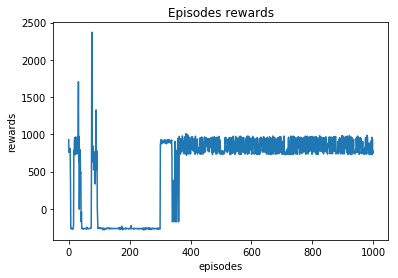

In [22]:
plt.plot(episode_results, label='x')
plt.title('Episodes rewards')
plt.ylabel('rewards') 
plt.xlabel('episodes') 
_ = plt.ylim()  

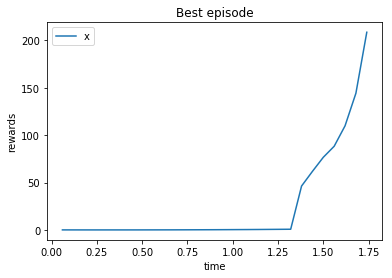

In [23]:
plt.plot(result_plot['time'], result_plot['rewards'], label='x')
plt.legend()
plt.title('Best episode')
plt.ylabel('rewards') 
plt.xlabel('time') 
_ = plt.ylim() 

## Visualization

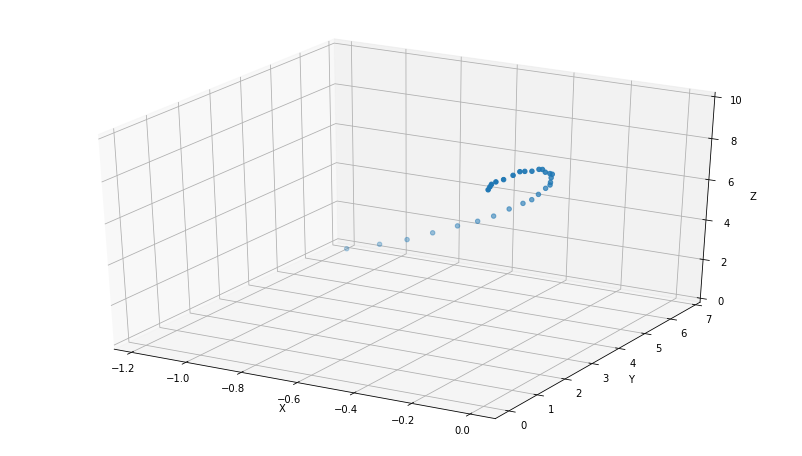

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(result_plot['x'], result_plot['y'], result_plot['z'])
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
ax.set_zlim(0, init_pose[2])

plt.show()

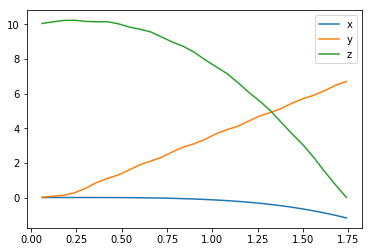

In [25]:
plt.plot(result_plot['time'], result_plot['x'], label='x')
plt.plot(result_plot['time'], result_plot['y'], label='y')
plt.plot(result_plot['time'], result_plot['z'], label='z')
plt.legend()
_ = plt.ylim()

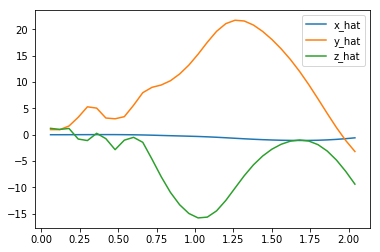

In [16]:
plt.plot(result_plot['time'], result_plot['x_velocity'], label='x_hat')
plt.plot(result_plot['time'], result_plot['y_velocity'], label='y_hat')
plt.plot(result_plot['time'], result_plot['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

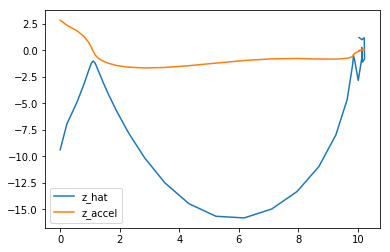

In [17]:
plt.plot(result_plot['z'], result_plot['z_velocity'], label='z_hat')
plt.plot(result_plot['z'], result_plot['x_accel'], label='z_accel')
plt.legend()
_ = plt.ylim()

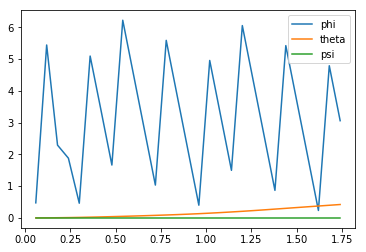

In [18]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

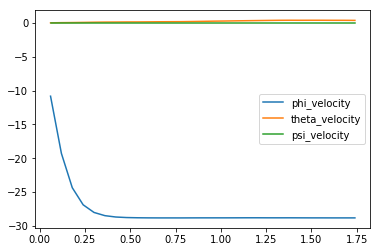

In [19]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

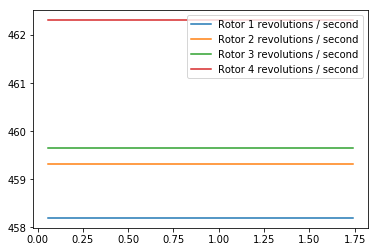

In [20]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I decided to teach the agent how to land the goal is to land softly from some specified height or the default value (0,0,10), the first step it was to define how to increase the reward return as the agent flys towards the goal which is the ground in this specific task, but at the same time it needs to move along a straight line down, so I added a negative terminal if the agent moves to the side over a threshold that returns a high negative reward, the same happens if for some reason the agent goes up in that case we just end the episode and return a high negative reward.
If it's not a terminal stage we keep the returned reward between -1 and 1 until the agent is in the touching surface height which is the value set to train the agent to decrease the velocity in Z axes when close to the ground to avoid damage the sctructure of the drone, so It gains a extra reward for having the velocity Z below the threshold we set.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:



















**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: